# Breast cancer classification challenge

## Part 0: All the packages

### Step 1: The essentials

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### Step 2: The "some things that not everyone has installed"

In [2]:
!pip install json
!pip install sklearn
!pip install eli5
!pip install tensorflow
!pip install keras

  Could not find a version that satisfies the requirement json (from versions: )
No matching distribution found for json
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /Users/Munchic/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading v

### Step 3: Some news to read while waiting

#### Best overall result:
Area under ROC curve: 0.9408866995073892<br/>
Recall: 0.7931034482758621<br/>
Precision: 0.8518518518518519<br/>
    
#### Best recall and AUC:
Area under ROC curve: 0.9584017515051998<br/>
Recall: 0.8275862068965517<br/>
Precision: 0.7741935483870968

## Part 1: Data import and preparation
### Step 1: Read in JSON measurements

In [3]:
import os
import json

data_dir = './RecruitmentData-JSON/'

# Columns to store records' fields
recs = {
    'ID': [],
    'Surgery': [],
    'Body_Temp': [],
    'Cancer': [],
    'Left_Temps': [],
    'Right_Temps': []
}

for record in os.listdir(data_dir):
    with open(data_dir + record) as rec:
        data = json.load(rec)
        
        for field in data.keys():
            recs[field].append(data[field])

In [4]:
# Sanity check
print(recs['Left_Temps'][0]) # first left breast

[32.35638888888889, 29.651944444444446, 30.430833333333325, 31.217222222222226, 30.373055555555553, 31.196944444444437, 31.41333333333333, 31.14861111111111, 31.811666666666667, 31.304166666666674, 32.124722222222225, 31.33555555555556, 32.05055555555556, 31.884444444444448, 32.095, 32.31666666666668, 32.41194444444445, 32.247499999999995, 32.16861111111112, 30.58388888888889, 29.692777777777774, 29.383611111111104, 29.539166666666663, 29.24277777777778, 29.102222222222224, 29.516111111111115, 31.6675, 32.780833333333334, 29.89527777777777, 29.663888888888884, 31.02472222222222, 29.009166666666673, 29.360833333333332, 30.449722222222217, 30.181388888888893, 31.531666666666677, 31.185000000000002, 31.385277777777773, 31.51416666666666, 31.01611111111111, 31.161944444444444, 32.221388888888896, 32.33916666666667, 33.01555555555556, 32.07083333333333, 31.189444444444444, 30.48972222222223, 29.904166666666658, 29.526111111111113, 29.751944444444447, 29.46444444444444, 29.52083333333334, 29

### Step 2: Put measurements in a dataframe and omit post-surgery cases

In [5]:
import pandas as pd

dataset = pd.DataFrame(recs)
dataset.head()

,ID,Surgery,Body_Temp,Cancer,Left_Temps,Right_Temps
0,115,0,35.8,0,"[32.35638888888889, 29.651944444444446, 30.430...","[30.349722222222226, 28.32555555555555, 28.115..."
1,154,0,35.6,0,"[31.091388888888886, 29.169999999999998, 28.63...","[28.53888888888889, 27.670833333333334, 28.504..."
2,20,0,35.0,0,"[32.24555555555557, 30.27777777777778, 30.0636...","[33.01444444444445, 30.63055555555555, 29.5402..."
3,98,1,36.1,0,"[31.71194444444444, 28.13416666666667, 27.1297...","[29.64055555555556, 28.330277777777777, 28.401..."
4,210,0,36.7,1,"[34.371111111111105, 32.69611111111111, 31.474...","[34.27194444444444, 31.854166666666668, 30.913..."


In [6]:
# Taking rows where the column value is no surgery
dataset = dataset.loc[dataset['Surgery'] == 0]
dataset = dataset.reset_index(drop=True) # reset indices
dataset.head()

,ID,Surgery,Body_Temp,Cancer,Left_Temps,Right_Temps
0,115,0,35.8,0,"[32.35638888888889, 29.651944444444446, 30.430...","[30.349722222222226, 28.32555555555555, 28.115..."
1,154,0,35.6,0,"[31.091388888888886, 29.169999999999998, 28.63...","[28.53888888888889, 27.670833333333334, 28.504..."
2,20,0,35.0,0,"[32.24555555555557, 30.27777777777778, 30.0636...","[33.01444444444445, 30.63055555555555, 29.5402..."
3,210,0,36.7,1,"[34.371111111111105, 32.69611111111111, 31.474...","[34.27194444444444, 31.854166666666668, 30.913..."
4,61,0,35.0,0,"[31.337500000000002, 29.987222222222222, 29.69...","[31.66611111111111, 29.794999999999998, 29.053..."


1. Rewrite left and right individual sensors' temperatures into separate columns

In [7]:
import numpy as np

temps_to_cols = {
    'Left_Temps': None,
    'Right_Temps': None
}

col_names = {
    'Left_Temps': [],
    'Right_Temps': []
}


for side in ['Left_Temps', 'Right_Temps']:
    num_meas, num_sensors = len(dataset[side]), len(dataset[side][0])
    temps_to_cols[side] = np.array(
        [dataset[side][x] for x in range(num_meas)])
    col_names[side] = list(map(lambda idx: side[:side.find('T')].lower() + str(idx), range(num_sensors)))

In [8]:
# Sanity check
pd.DataFrame(temps_to_cols['Left_Temps'], columns=col_names['Left_Temps']).head()

,left_0,left_1,left_2,left_3,left_4,left_5,left_6,left_7,left_8,left_9,...,left_86,left_87,left_88,left_89,left_90,left_91,left_92,left_93,left_94,left_95
0,32.356389,29.651944,30.430833,31.217222,30.373056,31.196944,31.413333,31.148611,31.811667,31.304167,...,28.477778,28.265278,29.428333,30.049444,30.254167,30.461111,30.165000,30.640556,29.439167,30.599444
1,31.091389,29.170000,28.633611,28.805278,29.184444,30.118056,30.163889,29.694722,29.980556,29.998889,...,30.279167,28.741944,29.433333,29.310833,29.321944,29.999167,29.675278,29.688056,30.292500,29.269444
2,32.245556,30.277778,30.063611,29.356667,29.539722,29.766944,29.575278,29.540000,30.222222,30.460556,...,27.842222,28.418611,28.835833,28.660278,28.528611,28.615833,28.235278,28.087778,27.993889,28.285000
3,34.371111,32.696111,31.474722,31.261389,32.046111,31.988889,31.983056,31.178333,31.789444,32.158611,...,31.933889,31.724444,32.073056,31.918056,32.127500,31.090000,31.993611,31.632500,31.661944,31.725000
4,31.337500,29.987222,29.697500,29.725278,30.421389,30.700278,30.270278,30.508611,31.275278,30.761111,...,30.780833,28.801667,29.107778,31.408611,30.601389,30.557500,31.263333,30.330556,30.298333,30.925000


2. Put back to the main dataframe

In [9]:
for side in ['Left_Temps', 'Right_Temps']:
    temps_df = pd.DataFrame(temps_to_cols[side], columns=col_names[side])
    dataset = pd.concat([dataset, temps_df], axis=1) # bind dataframes column-wise
dataset.head()

,ID,Surgery,Body_Temp,Cancer,Left_Temps,Right_Temps,left_0,left_1,left_2,left_3,...,right_86,right_87,right_88,right_89,right_90,right_91,right_92,right_93,right_94,right_95
0,115,0,35.8,0,"[32.35638888888889, 29.651944444444446, 30.430...","[30.349722222222226, 28.32555555555555, 28.115...",32.356389,29.651944,30.430833,31.217222,...,29.157500,29.332500,28.830000,29.890000,31.011111,31.836944,30.625000,30.421389,28.832500,31.108333
1,154,0,35.6,0,"[31.091388888888886, 29.169999999999998, 28.63...","[28.53888888888889, 27.670833333333334, 28.504...",31.091389,29.170000,28.633611,28.805278,...,30.085000,28.626111,28.819722,28.804167,29.219444,31.330833,30.599444,29.778056,30.038889,28.714722
2,20,0,35.0,0,"[32.24555555555557, 30.27777777777778, 30.0636...","[33.01444444444445, 30.63055555555555, 29.5402...",32.245556,30.277778,30.063611,29.356667,...,27.778889,27.856389,27.969444,28.260556,28.319444,28.382778,28.118889,27.748333,27.693889,27.815278
3,210,0,36.7,1,"[34.371111111111105, 32.69611111111111, 31.474...","[34.27194444444444, 31.854166666666668, 30.913...",34.371111,32.696111,31.474722,31.261389,...,30.750000,30.524167,30.065833,29.911389,30.586667,30.556944,30.681111,30.968333,30.930278,30.537500
4,61,0,35.0,0,"[31.337500000000002, 29.987222222222222, 29.69...","[31.66611111111111, 29.794999999999998, 29.053...",31.337500,29.987222,29.697500,29.725278,...,29.514722,28.994167,29.059167,29.678333,30.199722,30.055278,29.761389,29.666667,29.100833,29.674444


In [10]:
print("Size of dataset before dropping:", len(dataset))
tmp = dataset.dropna(how='any', axis=0, inplace=False)
print("Size of dataset after dropping:", len(tmp))

Size of dataset before dropping: 156
Size of dataset after dropping: 155


Just one wrong entry, let's neglect it since we cannot restore information from NaN.

In [11]:
dataset = tmp
dataset.reset_index(drop=True)
dataset.head()

,ID,Surgery,Body_Temp,Cancer,Left_Temps,Right_Temps,left_0,left_1,left_2,left_3,...,right_86,right_87,right_88,right_89,right_90,right_91,right_92,right_93,right_94,right_95
0,115,0,35.8,0,"[32.35638888888889, 29.651944444444446, 30.430...","[30.349722222222226, 28.32555555555555, 28.115...",32.356389,29.651944,30.430833,31.217222,...,29.157500,29.332500,28.830000,29.890000,31.011111,31.836944,30.625000,30.421389,28.832500,31.108333
1,154,0,35.6,0,"[31.091388888888886, 29.169999999999998, 28.63...","[28.53888888888889, 27.670833333333334, 28.504...",31.091389,29.170000,28.633611,28.805278,...,30.085000,28.626111,28.819722,28.804167,29.219444,31.330833,30.599444,29.778056,30.038889,28.714722
2,20,0,35.0,0,"[32.24555555555557, 30.27777777777778, 30.0636...","[33.01444444444445, 30.63055555555555, 29.5402...",32.245556,30.277778,30.063611,29.356667,...,27.778889,27.856389,27.969444,28.260556,28.319444,28.382778,28.118889,27.748333,27.693889,27.815278
3,210,0,36.7,1,"[34.371111111111105, 32.69611111111111, 31.474...","[34.27194444444444, 31.854166666666668, 30.913...",34.371111,32.696111,31.474722,31.261389,...,30.750000,30.524167,30.065833,29.911389,30.586667,30.556944,30.681111,30.968333,30.930278,30.537500
4,61,0,35.0,0,"[31.337500000000002, 29.987222222222222, 29.69...","[31.66611111111111, 29.794999999999998, 29.053...",31.337500,29.987222,29.697500,29.725278,...,29.514722,28.994167,29.059167,29.678333,30.199722,30.055278,29.761389,29.666667,29.100833,29.674444


### Step 3: Form data and targets

In [12]:
targets = dataset['Cancer']
targets.head()

0    0
1    0
2    0
3    1
4    0
Name: Cancer, dtype: int64

In [13]:
data_cols = np.hstack([['Body_Temp'], dataset.columns.get_values()[6:]])
data = dataset[data_cols]
data.head()

,Body_Temp,left_0,left_1,left_2,left_3,left_4,left_5,left_6,left_7,left_8,...,right_86,right_87,right_88,right_89,right_90,right_91,right_92,right_93,right_94,right_95
0,35.8,32.356389,29.651944,30.430833,31.217222,30.373056,31.196944,31.413333,31.148611,31.811667,...,29.157500,29.332500,28.830000,29.890000,31.011111,31.836944,30.625000,30.421389,28.832500,31.108333
1,35.6,31.091389,29.170000,28.633611,28.805278,29.184444,30.118056,30.163889,29.694722,29.980556,...,30.085000,28.626111,28.819722,28.804167,29.219444,31.330833,30.599444,29.778056,30.038889,28.714722
2,35.0,32.245556,30.277778,30.063611,29.356667,29.539722,29.766944,29.575278,29.540000,30.222222,...,27.778889,27.856389,27.969444,28.260556,28.319444,28.382778,28.118889,27.748333,27.693889,27.815278
3,36.7,34.371111,32.696111,31.474722,31.261389,32.046111,31.988889,31.983056,31.178333,31.789444,...,30.750000,30.524167,30.065833,29.911389,30.586667,30.556944,30.681111,30.968333,30.930278,30.537500
4,35.0,31.337500,29.987222,29.697500,29.725278,30.421389,30.700278,30.270278,30.508611,31.275278,...,29.514722,28.994167,29.059167,29.678333,30.199722,30.055278,29.761389,29.666667,29.100833,29.674444


## Part 2: Exploratory data analysis
### Step 1: Some basic stats
1. Cancer dataset balance

In [14]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 6), dpi=300)
plt.bar(x=['No cancer', 'Cancer'], height=[sum(targets == 0), sum(targets == 1)], color=["blue", "red"])
plt.show()

<Figure size 4500x1800 with 1 Axes>

Quite a large imbalance of data, so we have to be looking into recall, precision, and AUC-ROC.

2. Distribution of body temperatures

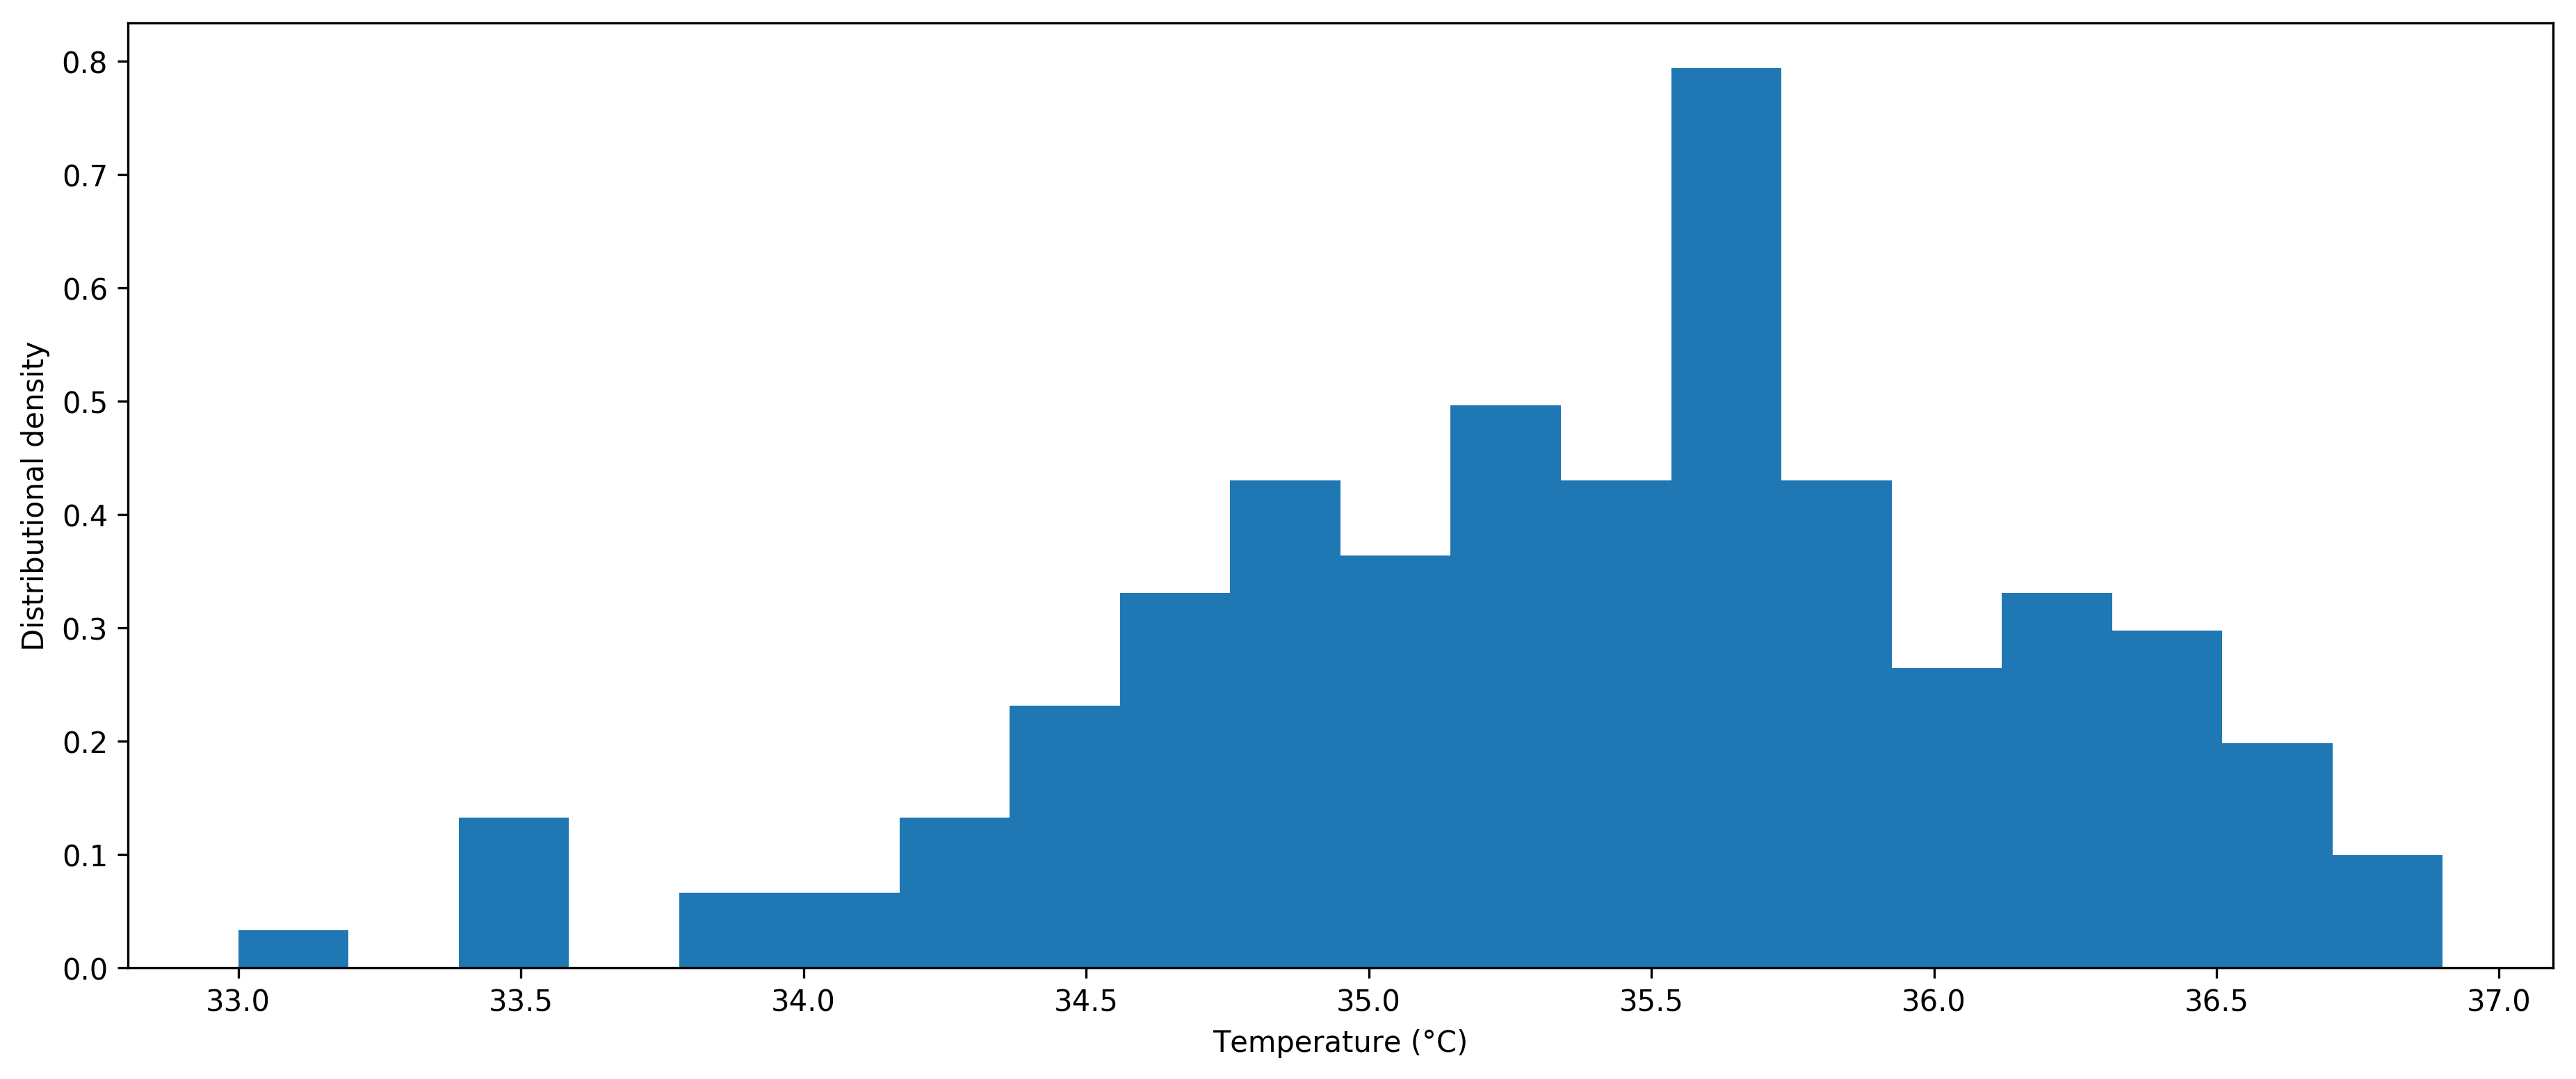

In [15]:
bd_temps = list(data['Body_Temp'])

plt.figure(figsize=(15, 6), dpi=300)
plt.hist(bd_temps, density=True, bins=20)
plt.xlabel('Temperature (°C)')
plt.ylabel('Distributional density')
plt.show()

3. Average measurements on each sensor

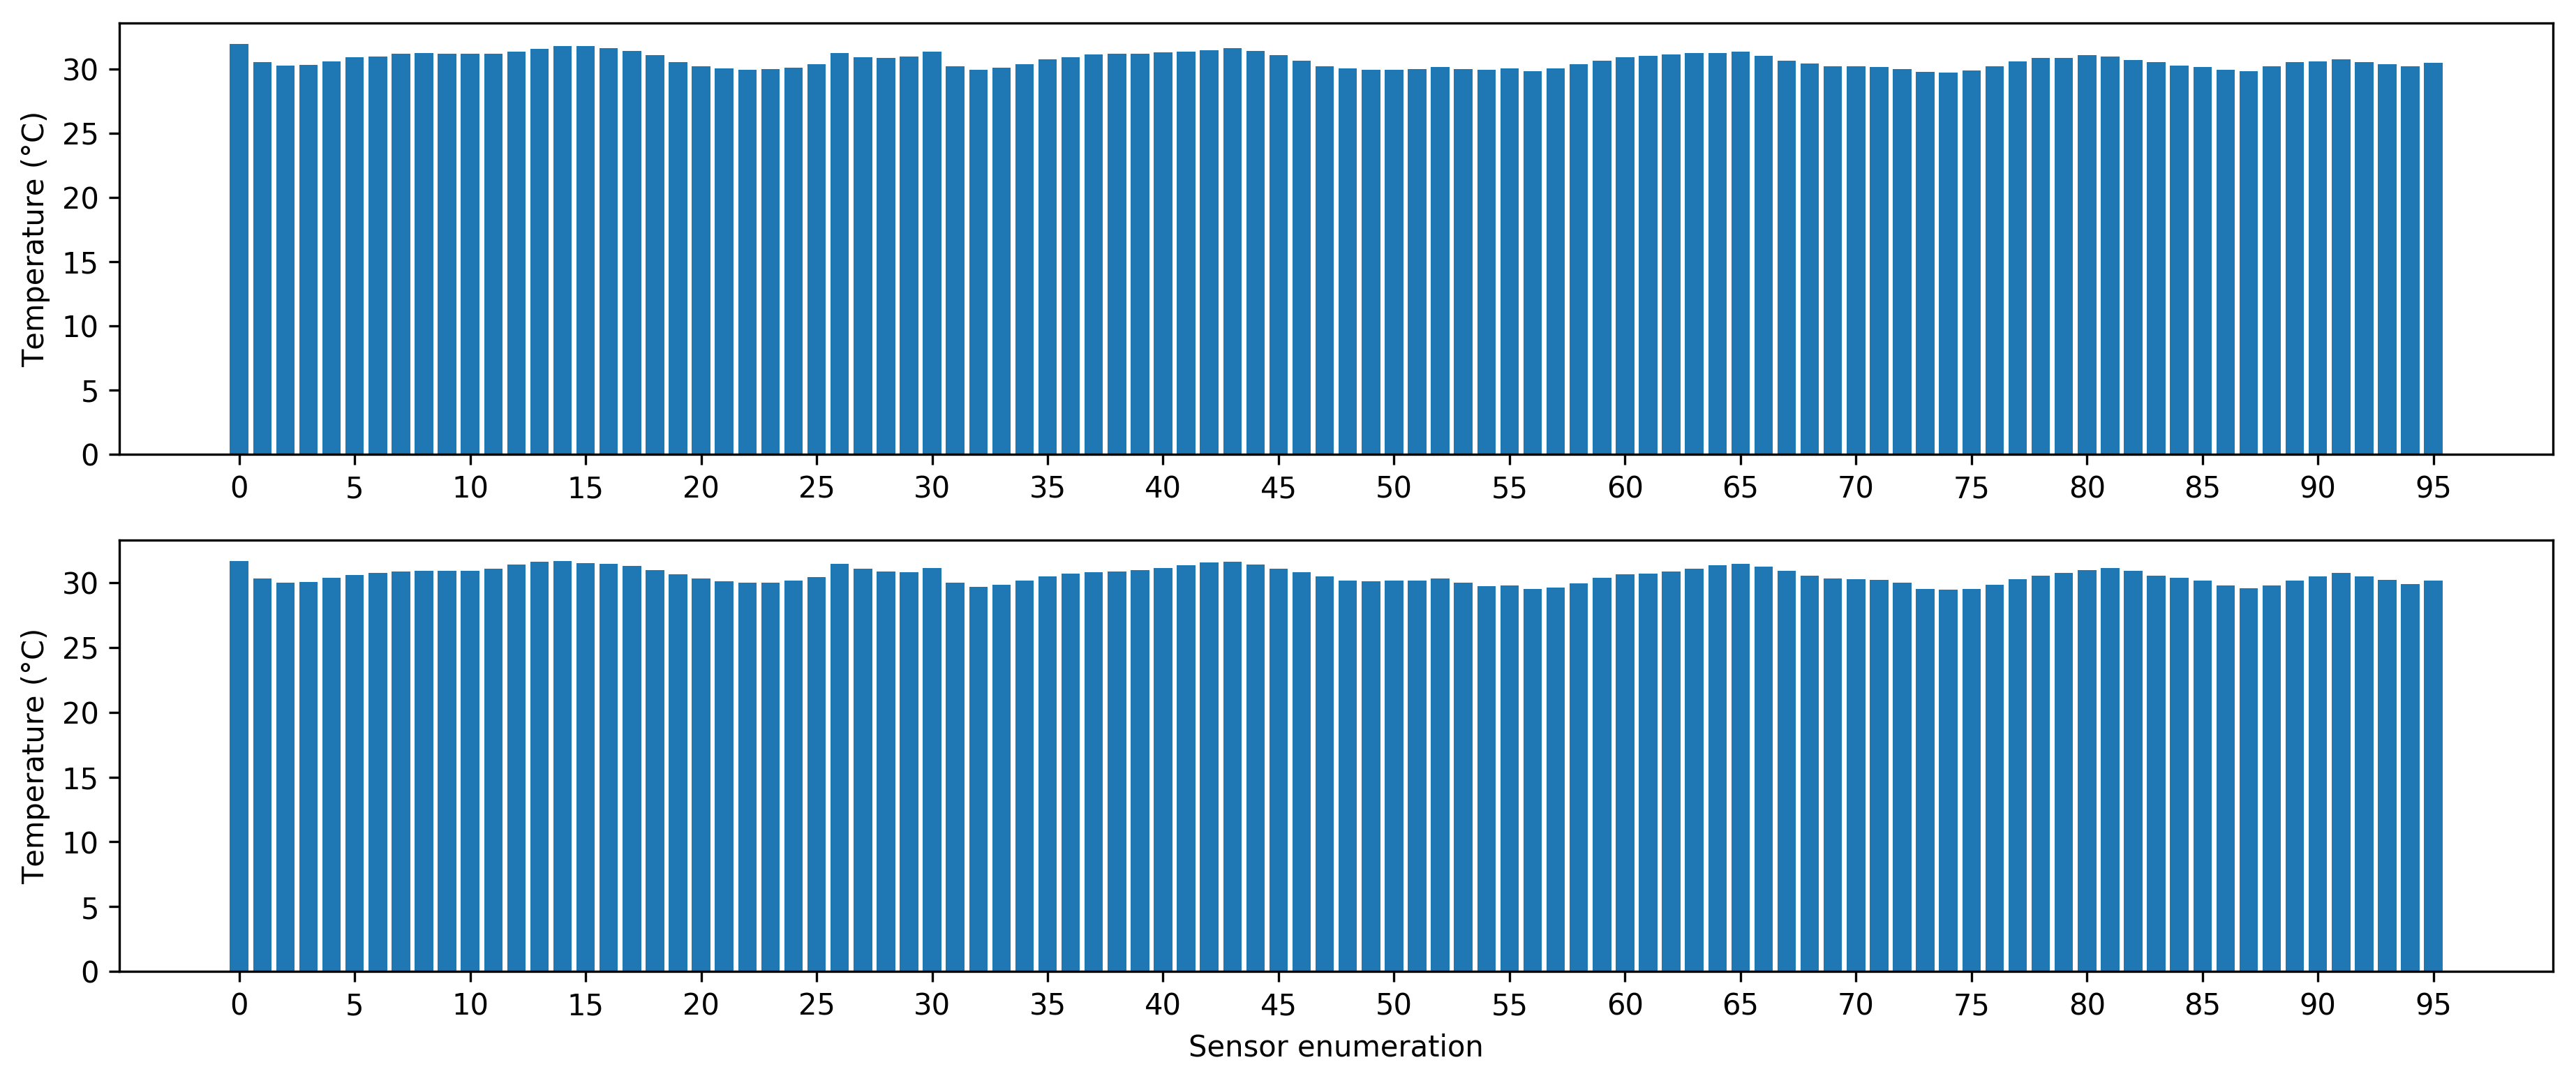

In [16]:
left_avgs = np.mean([data.iloc[idx][1:97] for idx in range(len(data))], axis=0) # column-wise mean
right_avgs = np.mean([data.iloc[idx][97:] for idx in range(len(data))], axis=0) # column-wise mean

plt.figure(figsize=(15, 6), dpi=300)
plt.subplot(2, 1, 1)
plt.bar(range(96), height=left_avgs, width=0.8)
plt.xticks(np.arange(0, 100, 5))
plt.ylabel('Temperature (°C)')

plt.subplot(2, 1, 2)
plt.bar(range(96), height=right_avgs, width=0.8)
plt.xticks(np.arange(0, 100, 5))
plt.xlabel('Sensor enumeration')
plt.ylabel('Temperature (°C)')

plt.show()

Should be pretty similar, since the sensors are located symmetrically on both cups!

### Step 2: Point temperatures of no cancer and cancer breasts

1. Let's first compare how the temperatures distributions look like in sample normal breasts and sample breasts with cancer.

In [17]:
'''
Custom enumerator to make indices for graph positions
'''
def my_enum(xs, start=0, step=1):
    for x in xs:
        yield (start, x)
        start += step

'''
Temperature distribution grapher for each cup
'''
def graph_rl_temps(row_idx, data=data, targets=targets, show_bd_temp=True):
    plt.figure(figsize=(15, 6), dpi=300)
    num_rows = len(row_idx)
    
    for plot_id, row_id in my_enum(row_idx, start=1, step=2):
        rec = data.iloc[row_id]
        cancer_status = 'Cancer' if list(targets)[row_id] == 1 else 'No cancer'
        
        num_sensors_per_cup = int(len(rec[1:]) / 2)
        last_row = (plot_id == num_rows * 2 - 1)
        
        # Left cup measurements
        plt.subplot(num_rows, 2, plot_id)
        plt.bar(range(96), height=rec[1:1+num_sensors_per_cup], width=1)
        if show_bd_temp:
            bd_temp_ln, = plt.plot([0, 96], [rec[0], rec[0]], color="red", label='Body temp')
        
        plt.yticks(np.arange(0, 40, 5))
        plt.xticks(np.arange(0, 97, 10), rotation='vertical')
        plt.ylabel(cancer_status)
        if last_row:
            plt.xlabel('Left breast')
            
        # Right cup measurements
        plt.subplot(num_rows, 2, plot_id + 1)
        plt.bar(range(96), height=rec[1+num_sensors_per_cup:], width=1)
        if show_bd_temp:
            plt.plot([0, 96], [rec[0], rec[0]], color="red")
        
        plt.yticks(np.arange(0, 40, 5))
        plt.xticks(np.arange(0, 97, 10), rotation='vertical')
        if last_row:
            plt.xlabel('Right breast')
            
    if show_bd_temp:
        plt.legend(handles=[bd_temp_ln], loc='lower center')
    plt.show()

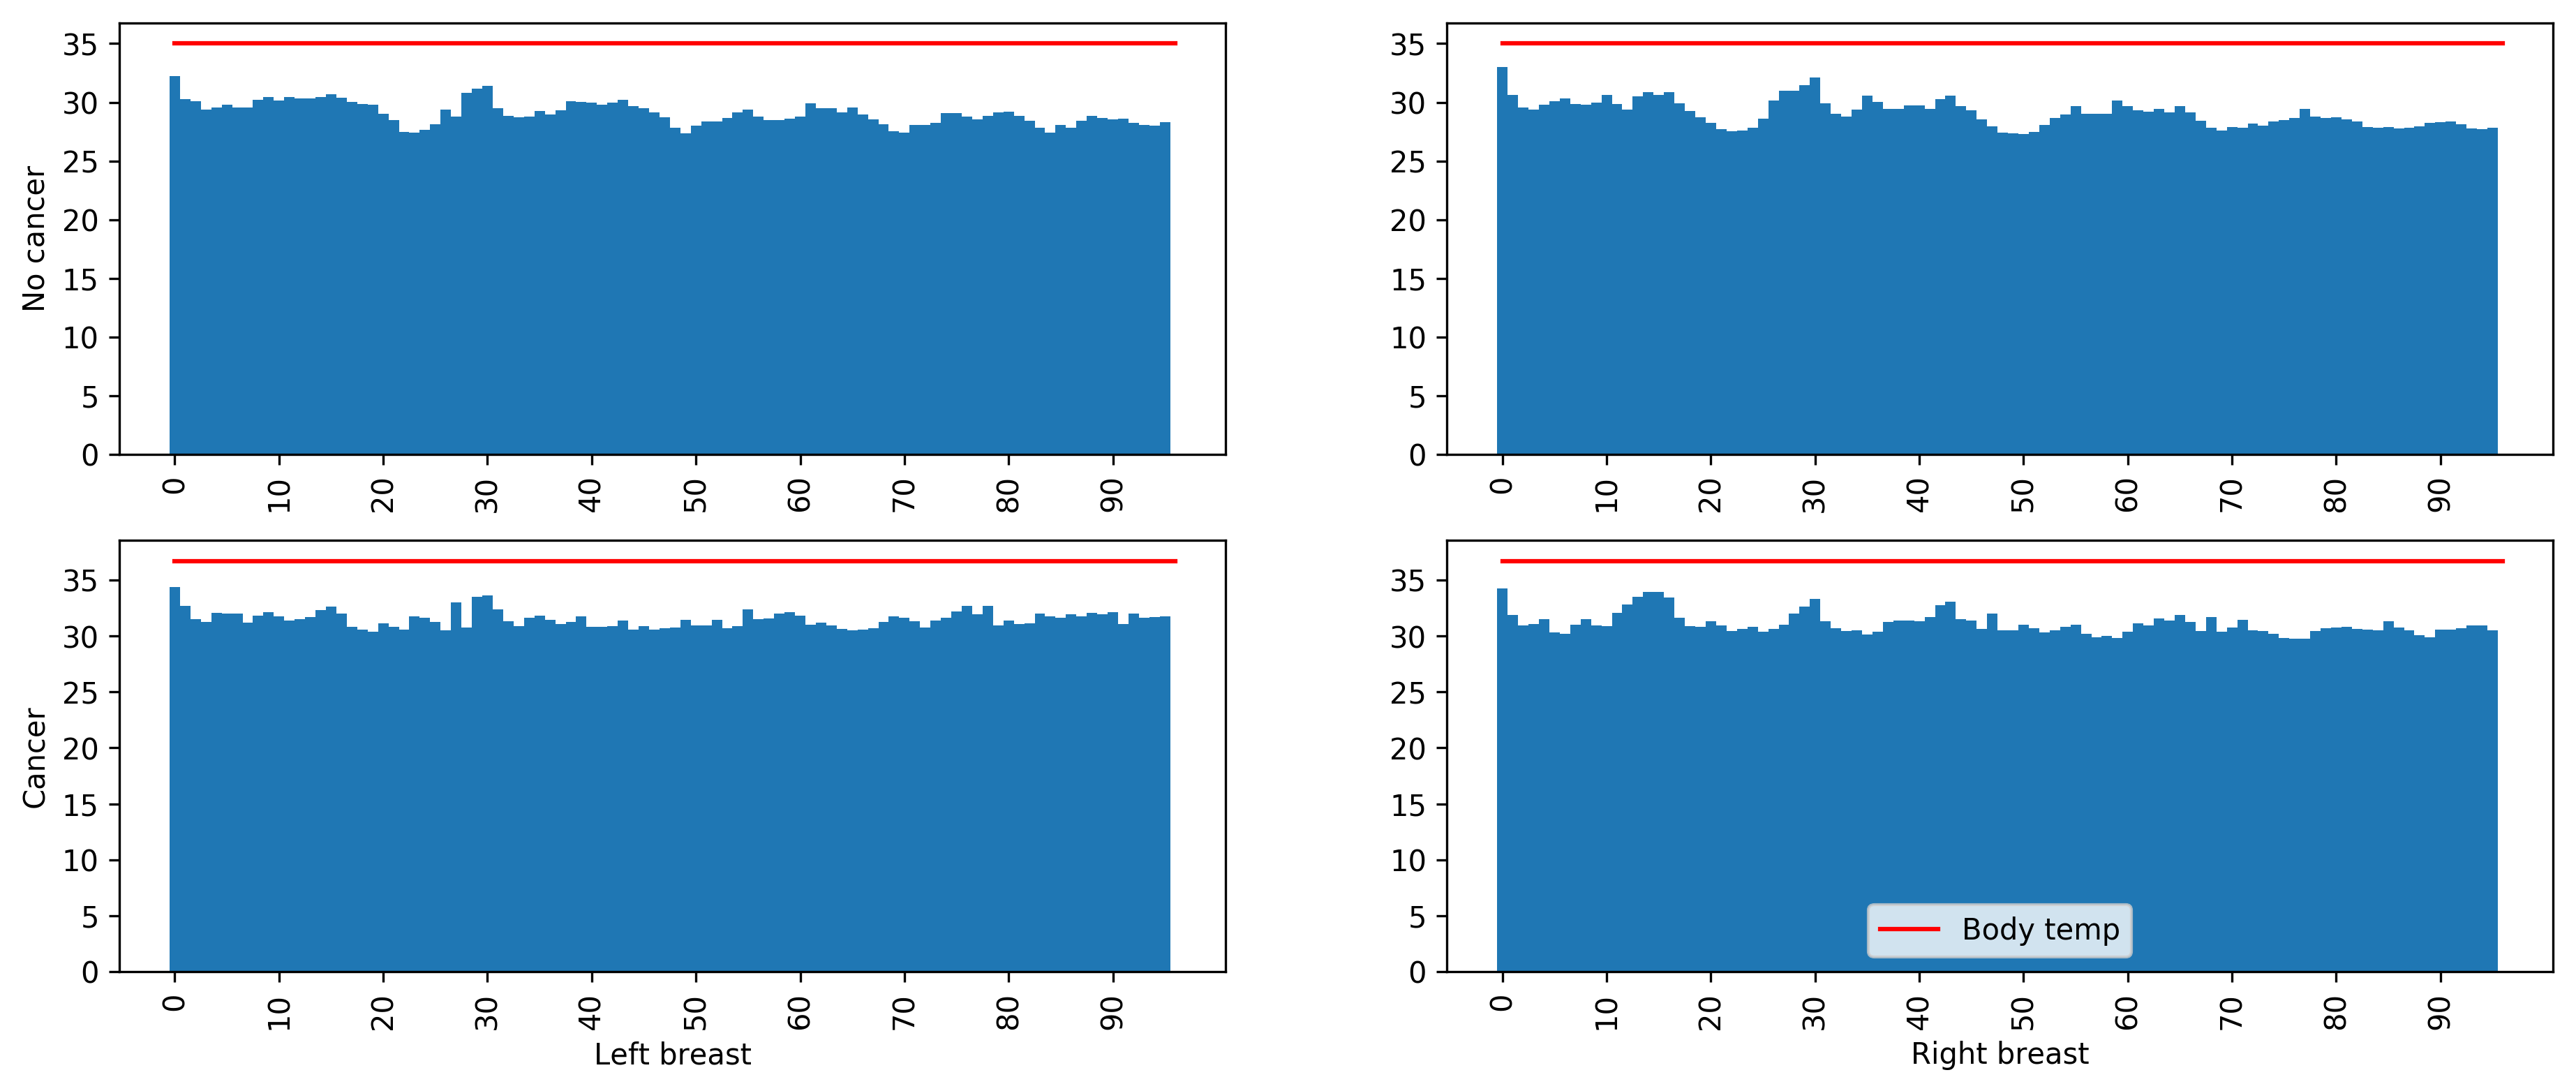

In [18]:
graph_rl_temps([2, 3])

We can observe that in normal breasts, the sensors show a "wavy" fashion as different parts of the breast have different temperatures depending on the distance from body and exposure to body heat. Observational studies show that only 2-5% of breast cancers affect both breasts, so in most cases, we should see weird things happening in one of the breasts.

We can see that in the person with breast cancer, the left breast temperature measurements behave a bit "too flat" in some places. This can indicate that because of tumor obtaining blood and heat, the temperature near the tumor is pretty much even and similar to the tumor temperature. Of course, this line of reasoning can also be subject to confirmation bias, so I will go more in depth.

2. It would be nice to know in which breast the cancer tumor is, but even if we do not know, when we average out the measurements in cancer left or right breasts, if our hypothesis is correct, we should get a generally flatter profile of the temperature distribution.

In [19]:
data_nocancer = data.loc[np.nonzero(targets == 0)]
data_cancer = data.loc[np.nonzero(targets == 1)]

avg_nocancer = np.mean(data_nocancer, axis=0)
avg_cancer = np.mean(data_cancer, axis=0)

avg_comp_df = pd.DataFrame(np.vstack([avg_nocancer, avg_cancer]))
avg_comp_df      

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,35.407200,31.883387,30.420836,30.146149,30.202138,30.502342,30.810491,30.856298,31.058171,31.134871,...,29.547209,29.333464,29.538884,29.947493,30.296838,30.606780,30.292969,30.045007,29.646442,29.978920
1,35.396552,32.235833,30.947088,30.557232,30.641513,30.815623,31.098477,31.225000,31.461772,31.617807,...,30.696571,30.564080,30.700757,30.911897,31.090920,31.322749,31.111552,30.938190,30.831561,30.873199


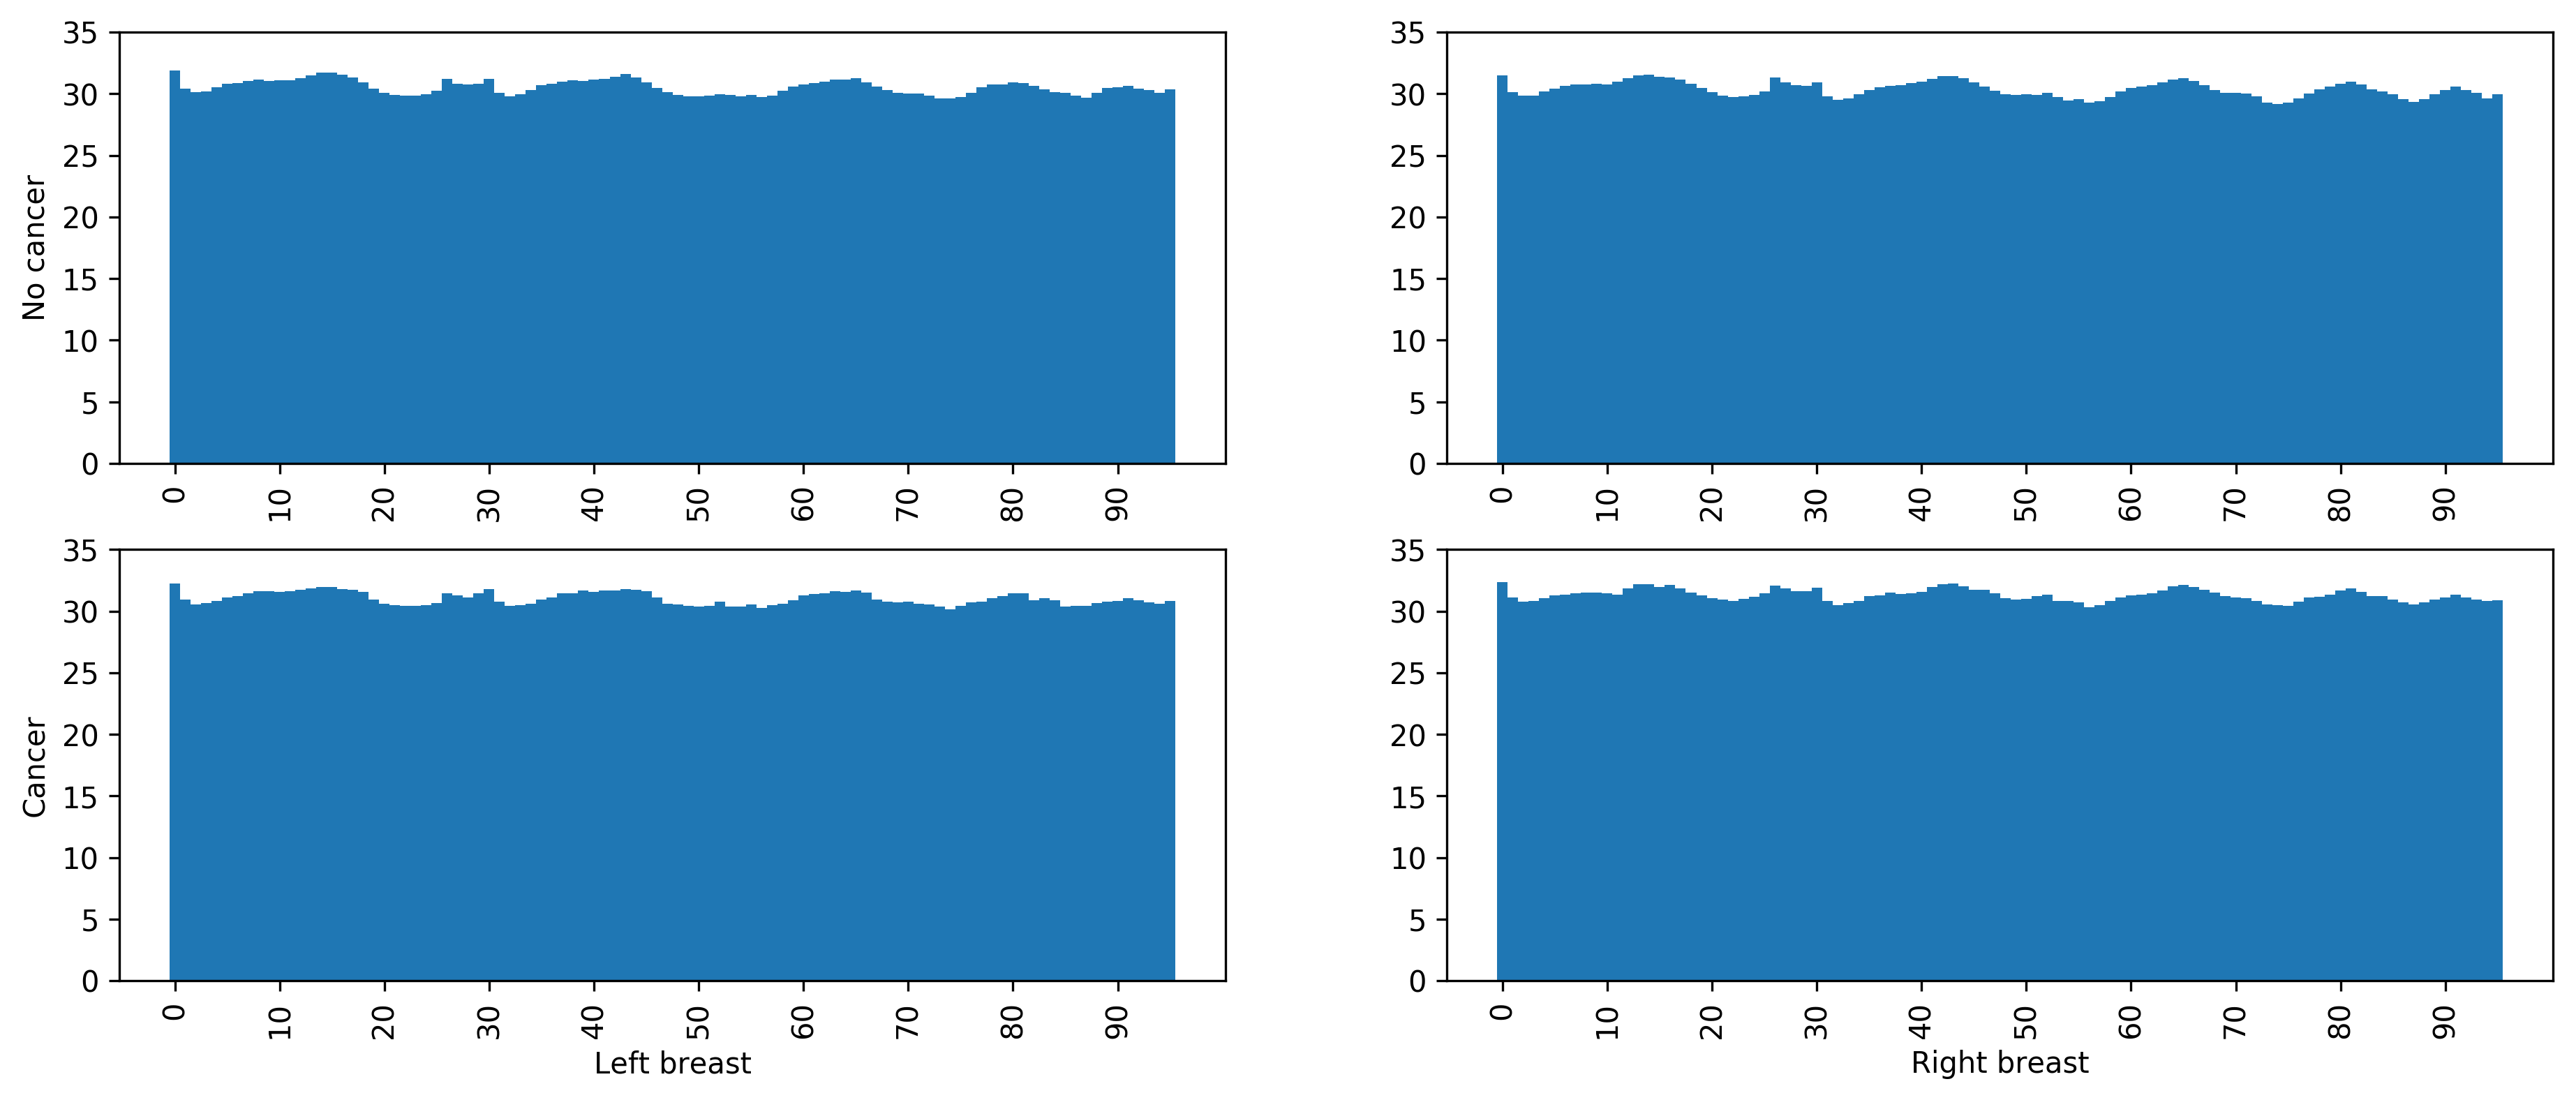

In [20]:
graph_rl_temps([0, 1], data=avg_comp_df, targets=[0, 1], show_bd_temp=False)

Unclear what is going on here. The challenge is probably that different people have tumors at diffent places, so considering that our dataset is pretty small, the "hot" parts pretty much evenly distribute out without showing obvious patterns. Sad.

## Part 3: Validation scheme

### Step 1: LOOCV for lighter models

In [21]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import recall_score, precision_score, roc_auc_score, roc_curve

def loocv_preds(model, X, y, threshold=0):
    loocv = LeaveOneOut()
    loocv.get_n_splits(X)
    
    # Since we're doing LOOCV, calculating scores on the spot is not possible
    dcsn_fn = [] 
    preds = []
    
    for train_idx, test_idx in loocv.split(X):
        trgt = np.array(y) # target value
        model.fit(X.iloc[train_idx], trgt[train_idx])
        
        dist_from_bound = model.decision_function(X.iloc[test_idx])
        dcsn_fn.append(dist_from_bound)
        preds.append(int(dist_from_bound >= threshold))
        
    return dcsn_fn, preds

### Step 2: K-fold for neural networks

For larger neural networks, LOOCV will take forever to validate, so I'm creating this. I make sure to reset model weights each time I change training and validation sets, so that we don't have indirect information flow and so that the network would not suspect of anything in learned in the fold before.

In [22]:
from sklearn.model_selection import KFold

def kfold_preds(model, X, y, threshold=0.5, epochs=25, n_splits=7):
    kf = KFold(n_splits=n_splits)
    dcsn_fn = [] 
    preds = []
    
    for train_idx, test_idx in kf.split(X): 
        # Reset weights and reset model 
        model.reset_states()
        model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])
        
        
        trgt = np.array(y) # target value
        model.fit(X.iloc[train_idx], trgt[train_idx], epochs=epochs, verbose=0)
        dcsn = model.predict(X.iloc[test_idx])
        
        for elem in dcsn:
            dcsn_fn.append(elem)
            preds.append(elem >= threshold)
        
    return dcsn_fn, preds

### Step 3: Metrics

In [23]:
def auc_roc(y, dcsn_fn):
    aucroc = roc_auc_score(y, dcsn_fn)
    
    fpr, tpr, _ = roc_curve(y, dcsn_fn, drop_intermediate=False)
    
    plt.figure(figsize=(12, 6), dpi=300)
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % aucroc)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False positive Rate')
    plt.ylabel('True positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    
    return aucroc

def rec_prec(y, preds):
    rec_sc = recall_score(y, preds)
    prec_sc = precision_score(y, preds)
    return rec_sc, prec_sc

## Part 4: Separability evaluation

### Step 1: Normalize the data

In [24]:
means = data.mean(axis=0)
stds = data.std(axis=0)

norm_data = (data - means) / (stds + 1e-16)
norm_data.head()

,Body_Temp,left_0,left_1,left_2,left_3,left_4,left_5,left_6,left_7,left_8,...,right_86,right_87,right_88,right_89,right_90,right_91,right_92,right_93,right_94,right_95
0,0.514501,0.249376,-0.587489,0.130107,0.694777,-0.155391,0.232957,0.353118,0.001181,0.442206,...,-0.366109,-0.144017,-0.578505,-0.162093,0.350101,0.702438,0.102760,0.119525,-0.622229,0.571741
1,0.253888,-0.537865,-0.907441,-1.125057,-1.143731,-1.047553,-0.562022,-0.579386,-1.129996,-0.986758,...,0.185001,-0.560620,-0.584804,-0.861448,-0.778419,0.374918,0.087201,-0.266336,0.093685,-0.864793
2,-0.527952,0.180402,-0.172013,-0.126357,-0.723434,-0.780884,-0.820738,-1.018686,-1.250376,-0.798166,...,-1.185264,-1.014574,-1.105899,-1.211573,-1.345303,-1.532859,-1.423015,-1.483731,-1.297922,-1.404598
3,1.687261,1.503189,1.433461,0.859150,0.728443,1.100390,0.816500,0.778321,0.024306,0.424864,...,0.580137,0.558786,0.178878,-0.148317,0.082756,-0.125889,0.136922,0.447573,0.622667,0.229153
4,-0.527952,-0.384704,-0.364906,-0.382046,-0.442459,-0.119113,-0.133012,-0.499984,-0.496762,0.023618,...,-0.153851,-0.343554,-0.438060,-0.298422,-0.160969,-0.450533,-0.423025,-0.333146,-0.462990,-0.288813


### Step 2: PCA with two eigenvectors for visualization

In [25]:
from sklearn import decomposition

n_components = 2
pca = decomposition.PCA(n_components=n_components, svd_solver='randomized', whiten=True)
pca.fit(norm_data)
print("Explained variance of components:", pca.explained_variance_ratio_) # how much information is retained

Explained variance of components: [0.69780441 0.04143069]


Seems like 2 is a reasonable amount since eigenvectors that come after these will only be able to explain a tiny bit of variance (less than 4%), so we are retaining a good amount of information. This makes sense because when there is no tumor, the temperatures tend to behave correlatedly (e.g., if the body gets hotter, point A and point B on the cup will both capture slightly higher temperatures, just of varying degree of temperature increase). On the other hand, when there is tumor, areas around the tumor heat up just with slightly varying speeds.

1. Calculating back the single-value decomposition of original vectors to plot

In [26]:
data_svd = pca.transform(norm_data)
data_svd[0] # check

array([-0.0316851 ,  1.50810279])

2. Plotting to see have a decision boundary overview

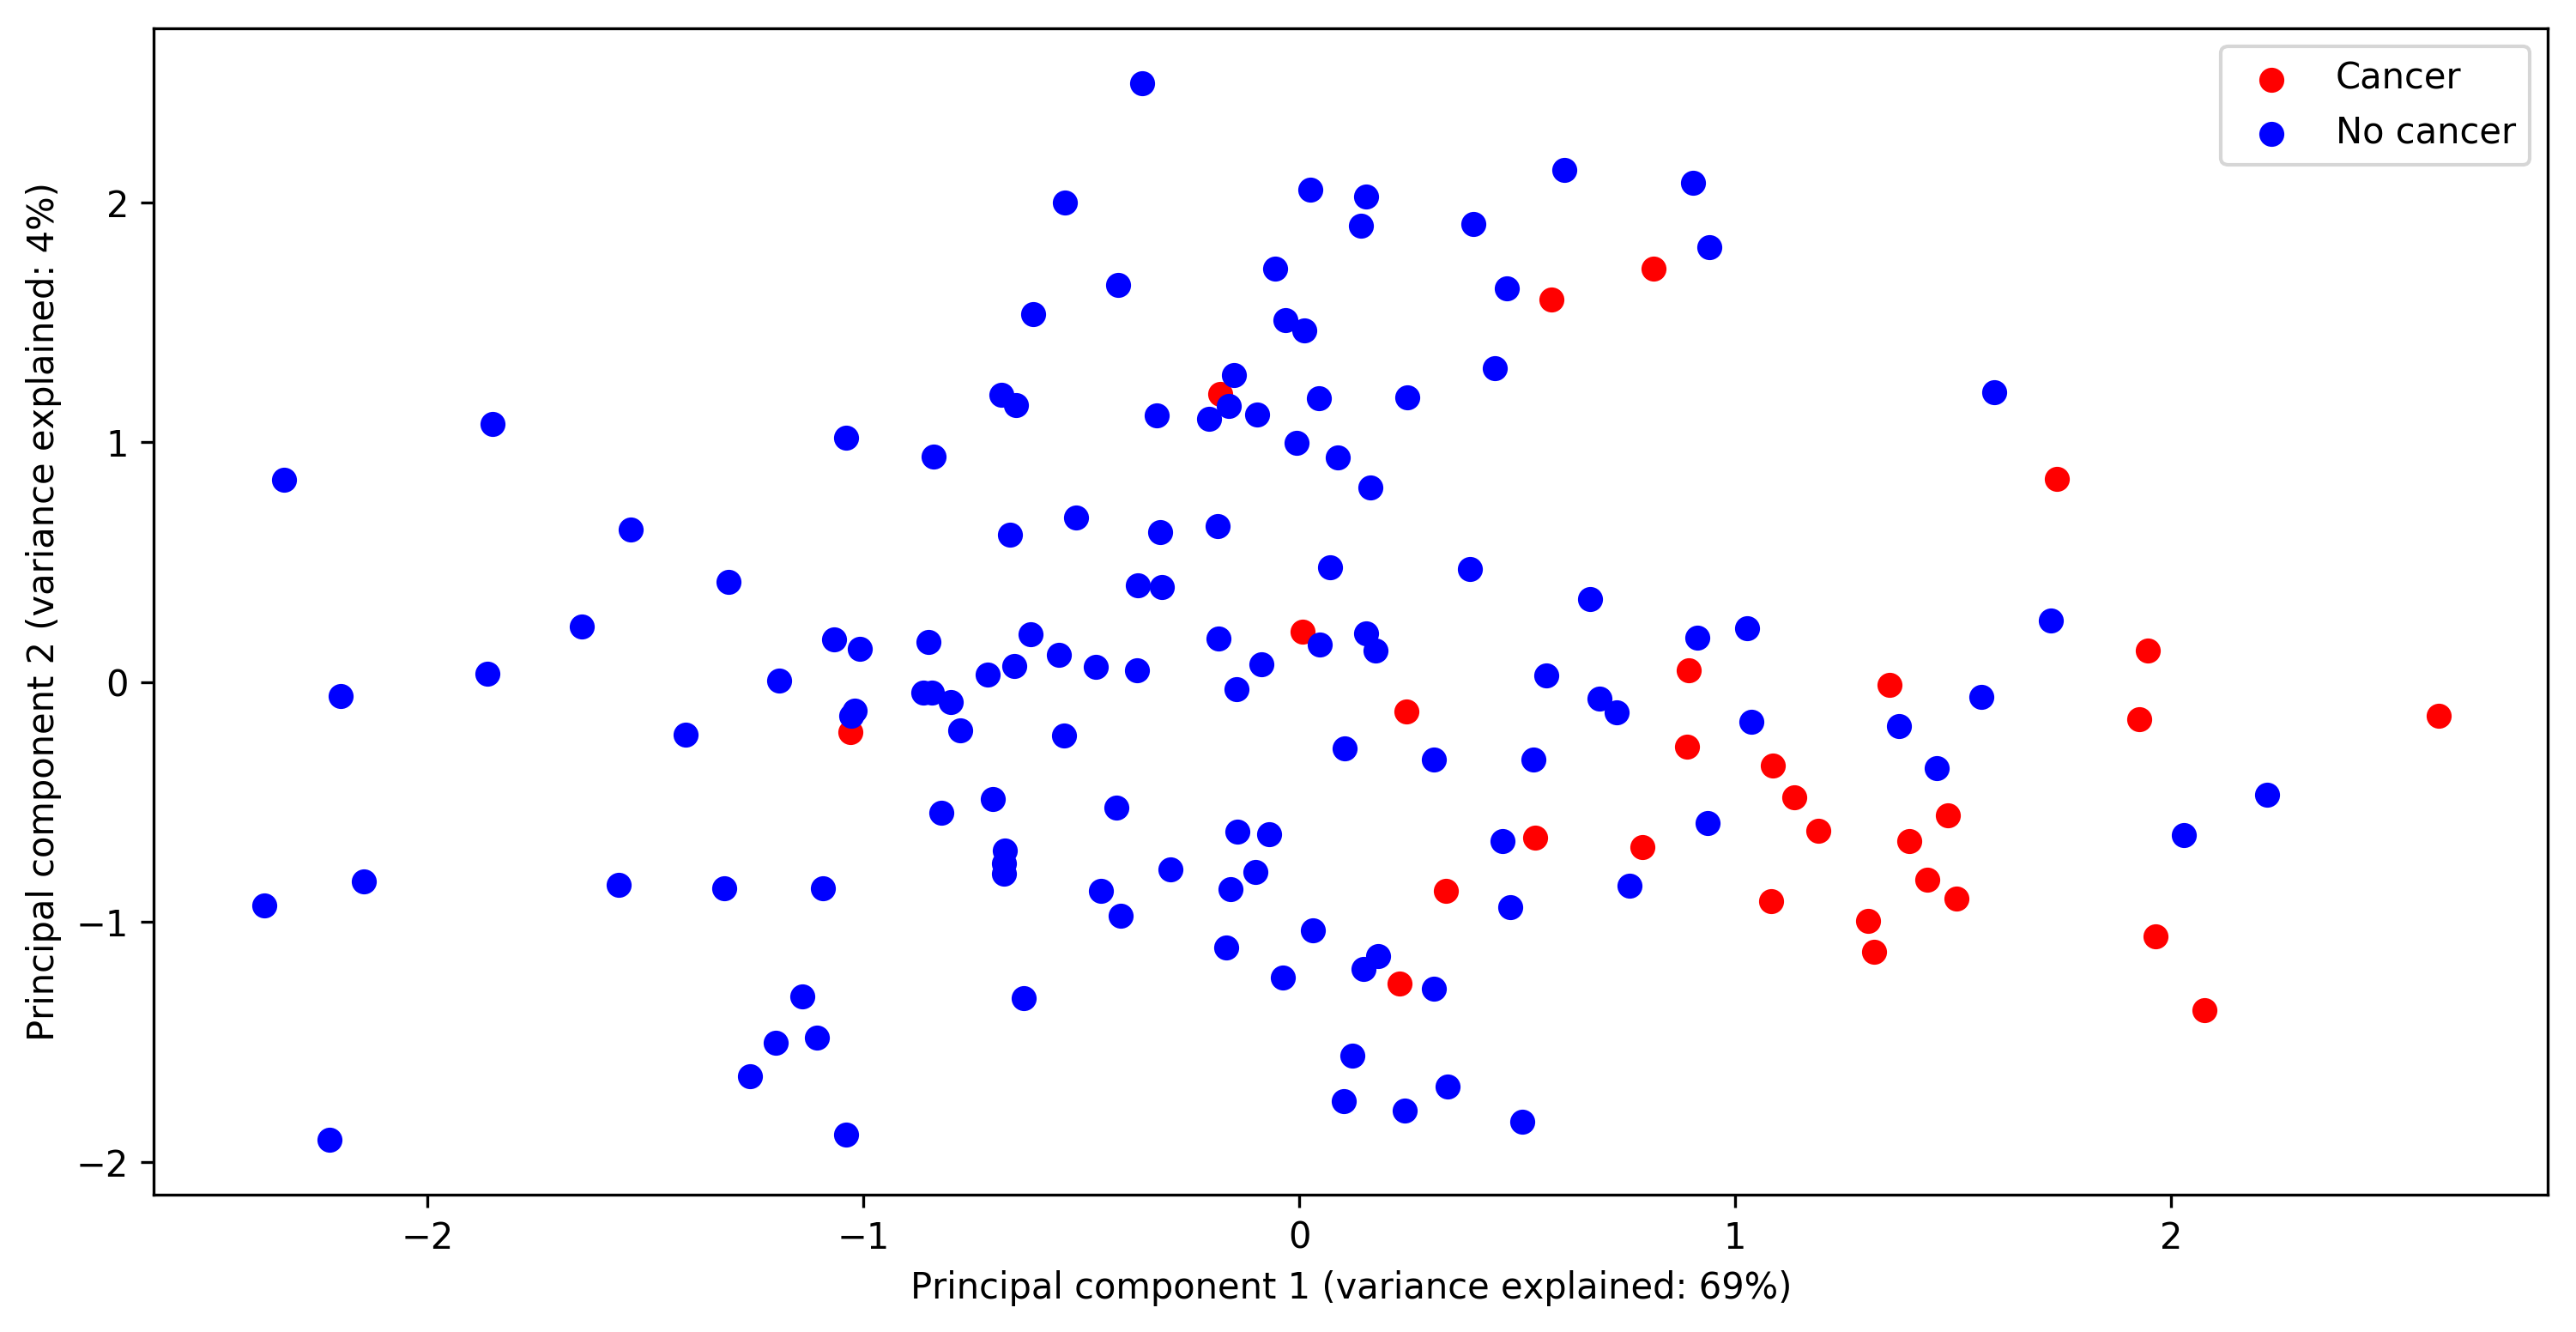

In [27]:
nocancer_idx = np.where(targets == 0)
cancer_idx = np.where(targets == 1)

plt.figure(figsize=(12, 6), dpi=300)
plt.scatter(*zip(*data_svd[cancer_idx]), color="red", label='Cancer')
plt.scatter(*zip(*data_svd[nocancer_idx]), color="blue",label='No cancer')
plt.xlabel('Principal component 1 (variance explained: {0}%)'.format(int(pca.explained_variance_ratio_[0] * 100)))
plt.ylabel('Principal component 2 (variance explained: {0}%)'.format(int(pca.explained_variance_ratio_[1] * 100)))
plt.legend(loc="upper right")
plt.show()

We can see that there are some "deep" overlaps of red dots inside the cluster of blue dots, and some blue dots in the cluster of red dots, thus, linear separation will create many false positives and negatives. Most likely, we care more about flagging the red dots inside the blue cluster at a cost of the blue dots in the red cluster. It's better to have a good recall score because the cost of in-hospital check-up is lower than the cost of life. 

3. Let's check out what the principal components found out about the "interesting" spots

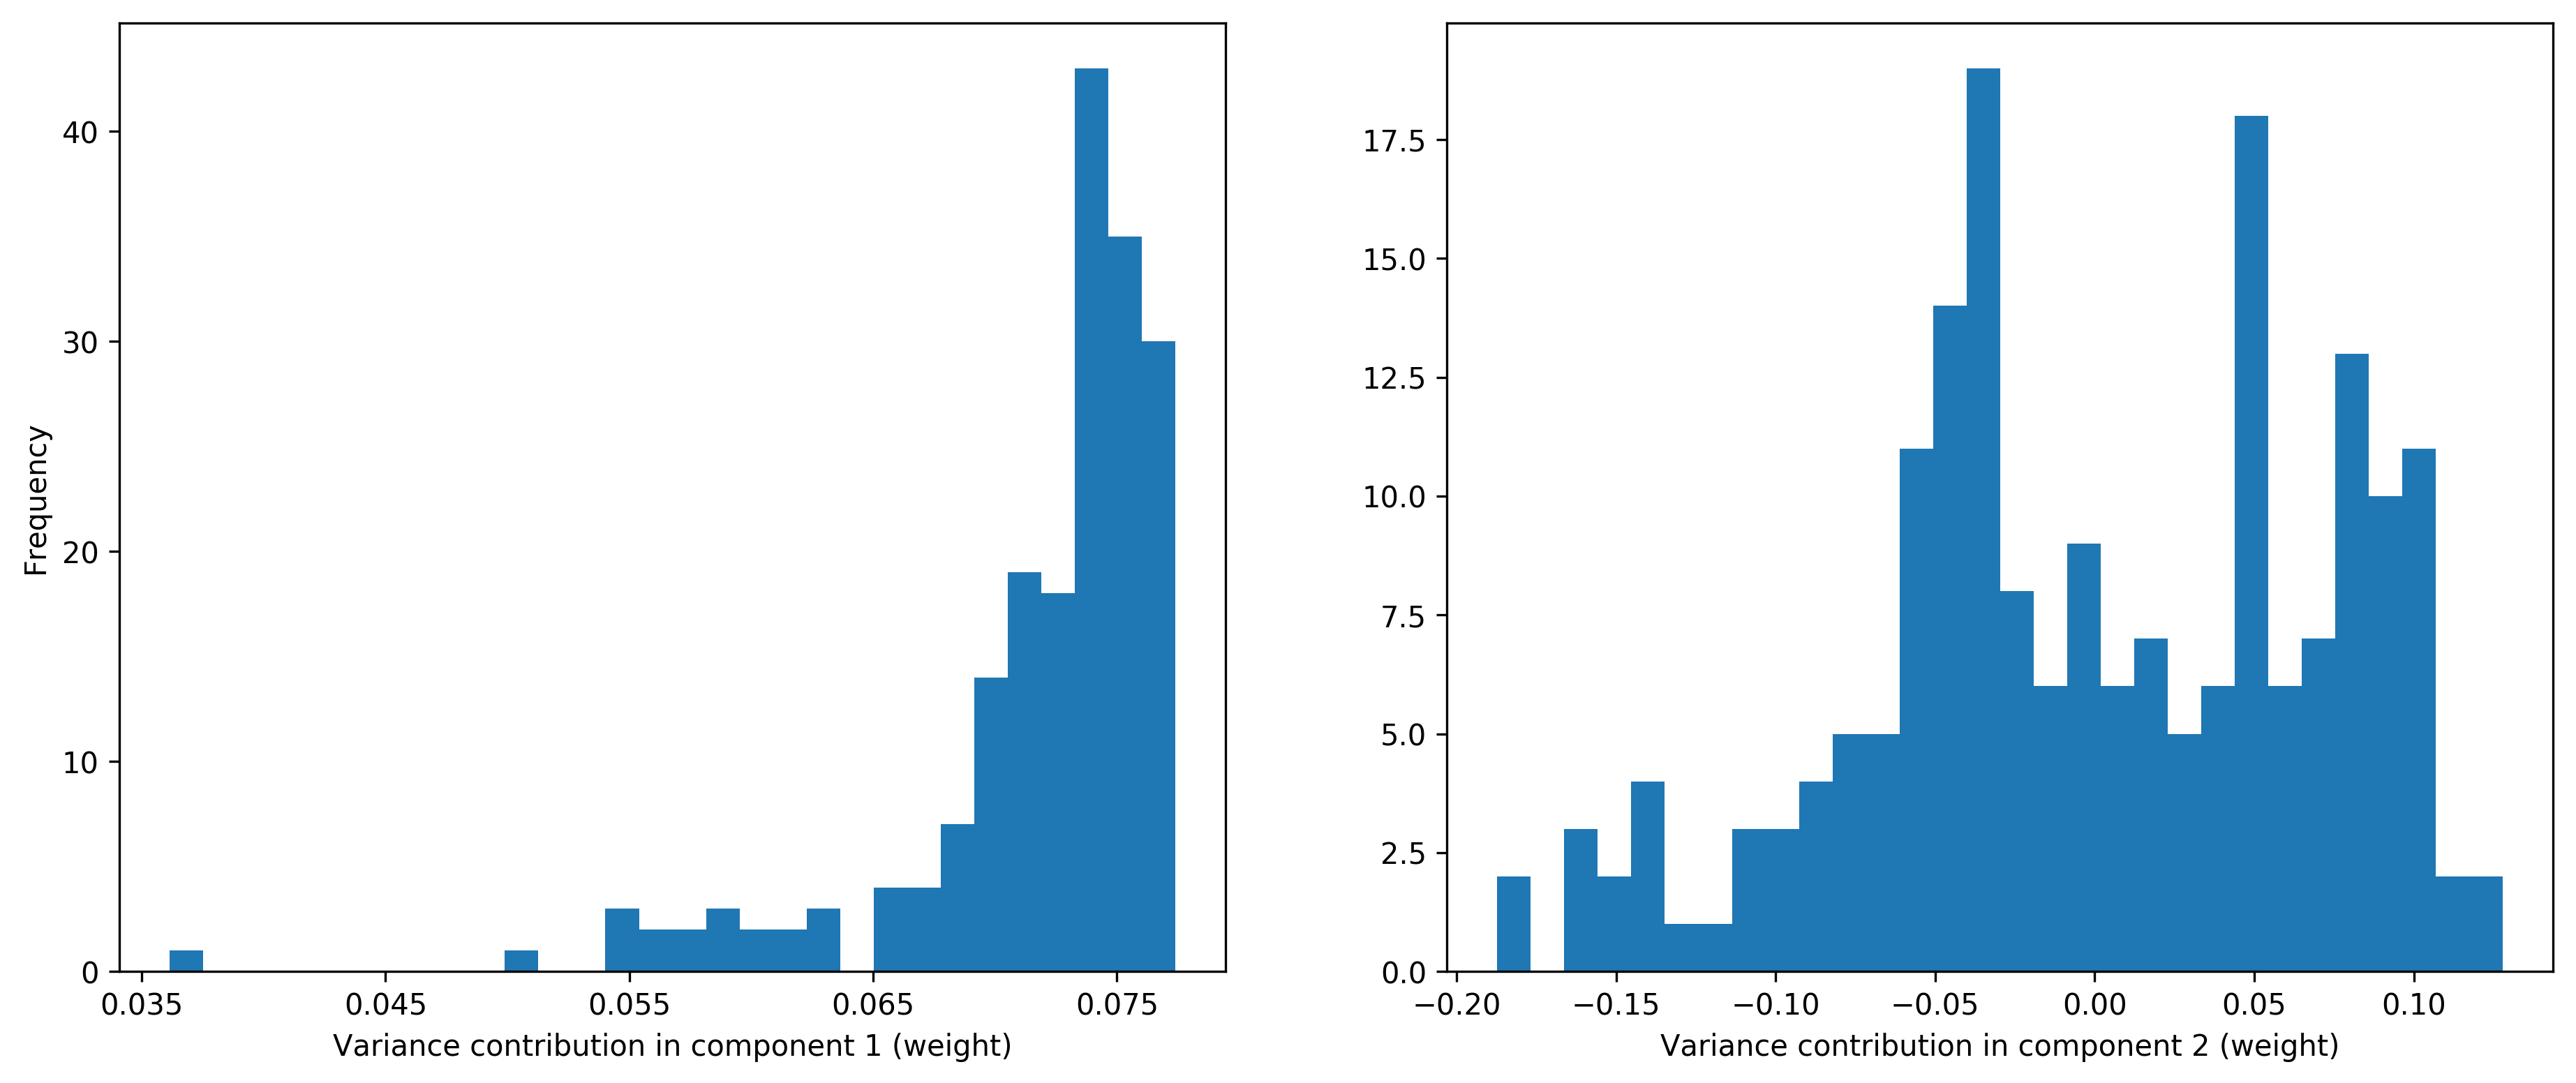

In [28]:
plt.figure(figsize=(15, 6), dpi=300)
plt.subplot(1, 2, 1)
plt.hist(pca.components_[0], bins=30)
plt.xticks(np.arange(0.035, 0.085, 0.01))
plt.xlabel('Variance contribution in component 1 (weight)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(pca.components_[1], bins=30)
plt.xlabel('Variance contribution in component 2 (weight)')
plt.show()

We can see that for PC1 with 69.78% variance explained, most of the weights are in the maximum range of 0.075, meaning that we have no particularly "outstanding" feature. It mostly makes sense because tumors can appear anywhere, so it is hard to observe a pin-point of "Hey, sensor 5 has higher temperature, and most of the time it is the one that detects cancer." Maybe we have to do some manipulations with combination of features to come up with separation.

## Part 5: Learning models

### Step 1: Naive linear separation

In [29]:
from sklearn import svm

clf = svm.SVC(kernel='linear', gamma='scale', probability=True)

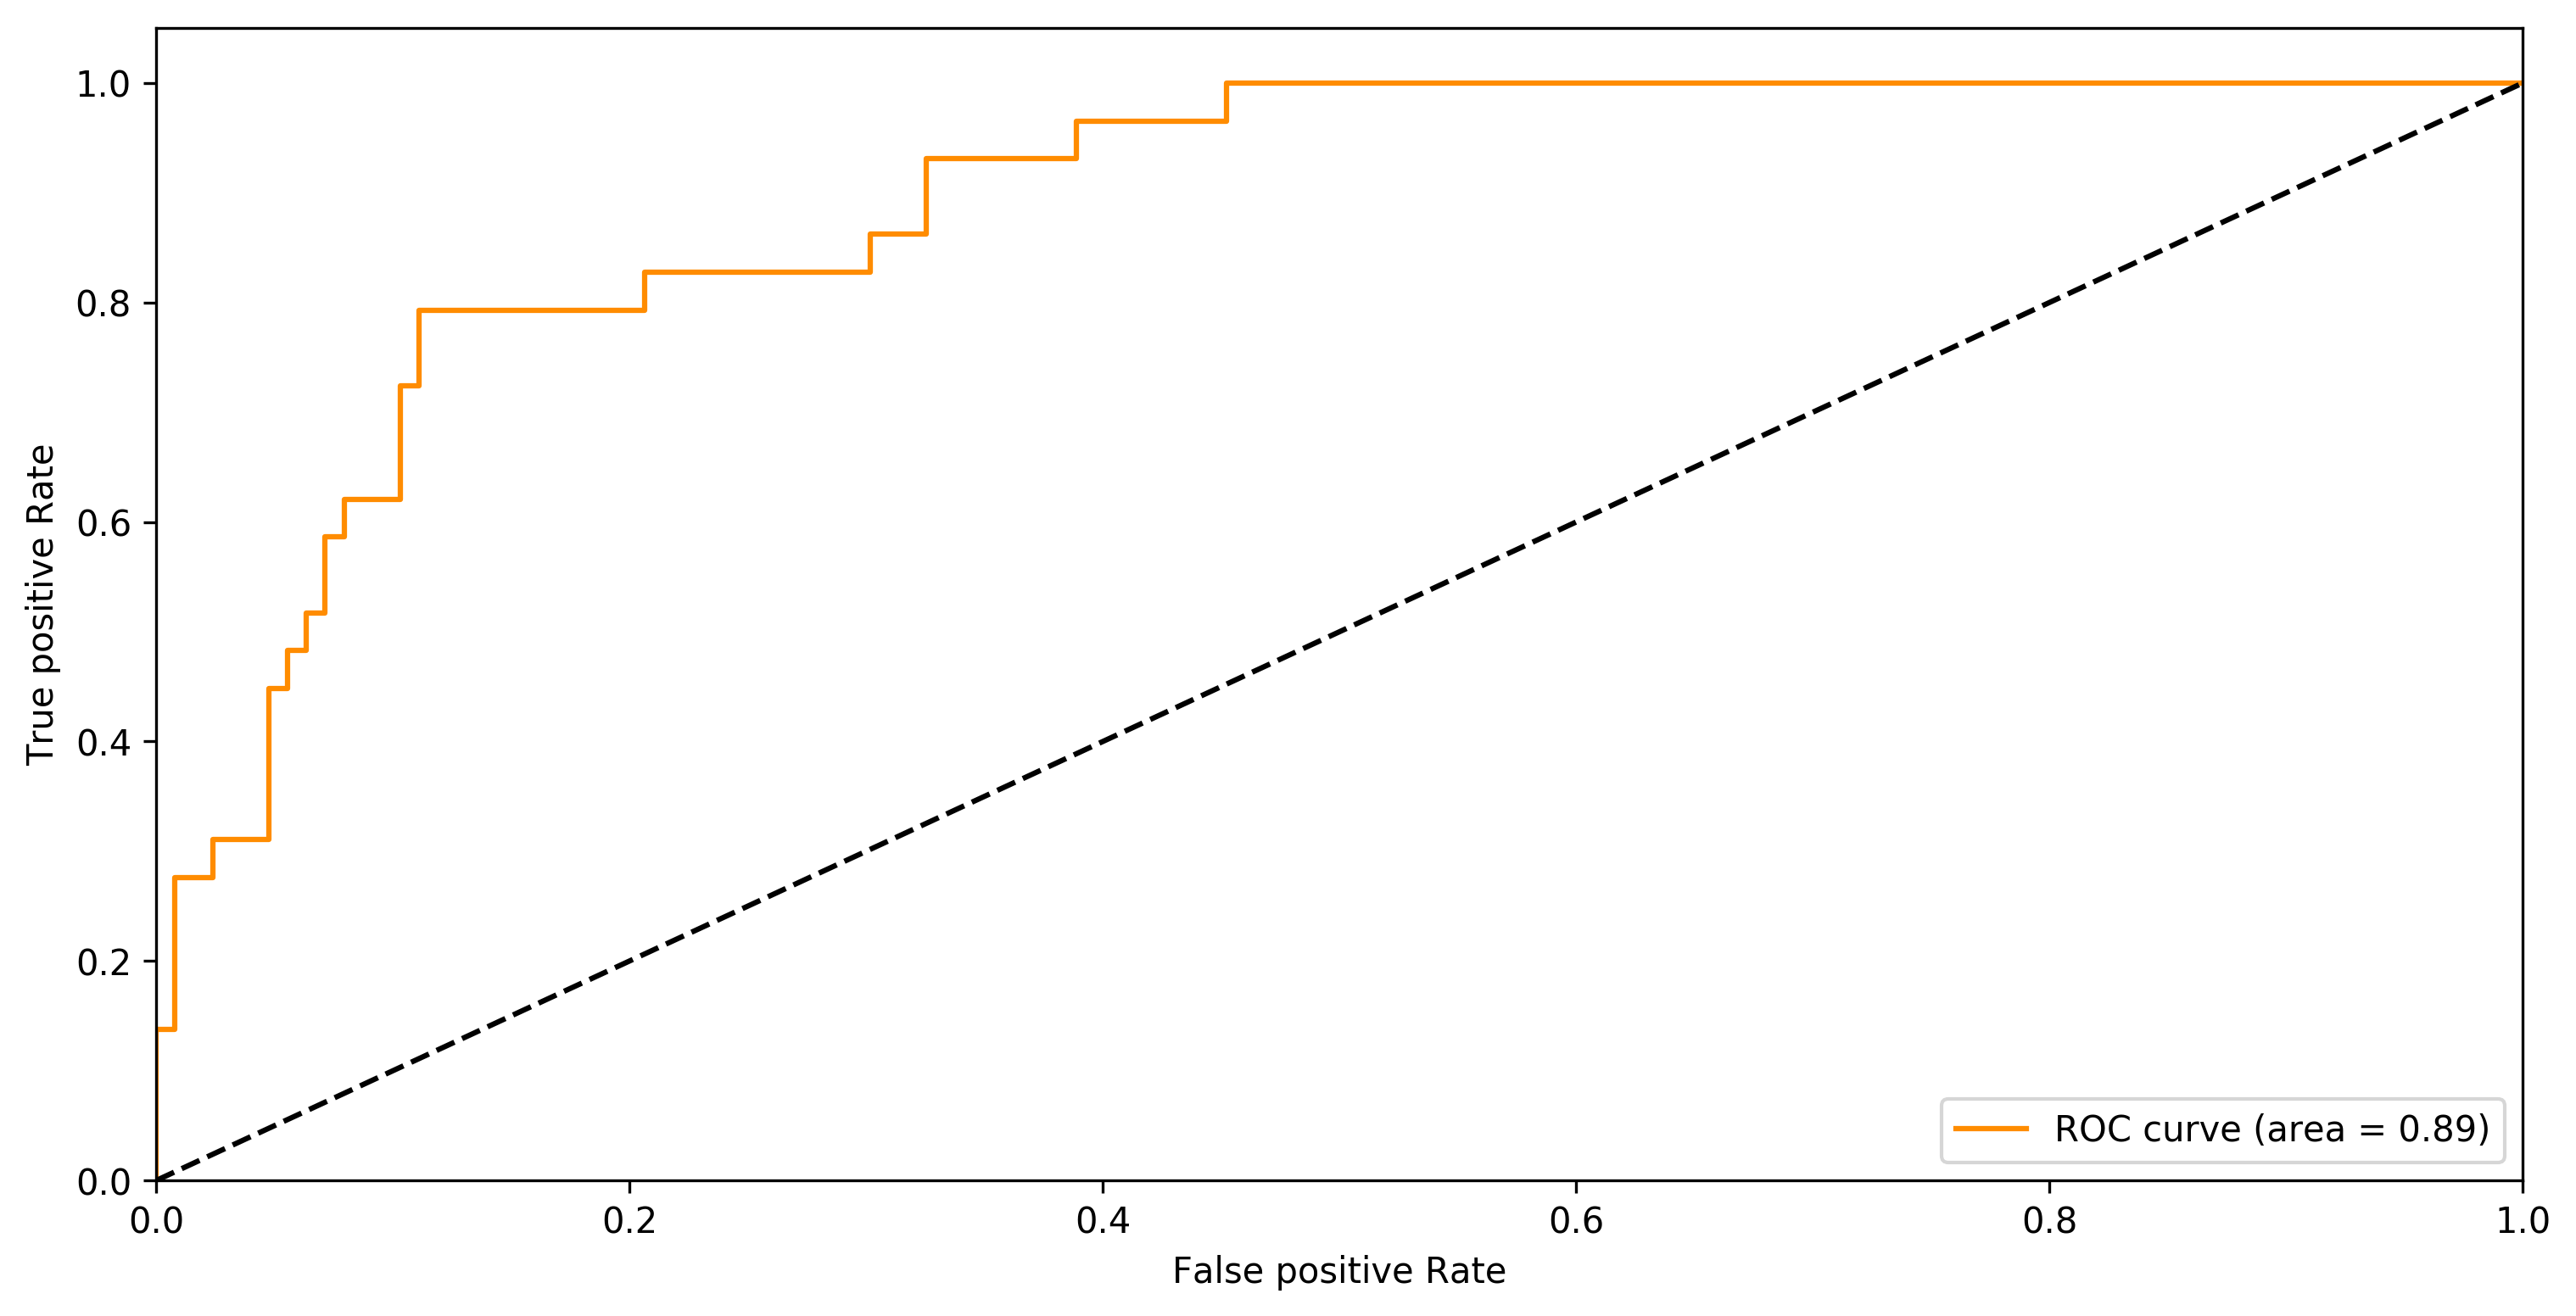

Area under ROC curve: 0.8924466338259442


In [30]:
dcsn_fn, preds = loocv_preds(clf, norm_data, targets)
print("Area under ROC curve:", auc_roc(targets, dcsn_fn))

In [31]:
rec, prec = rec_prec(list(targets), np.array(preds).flatten())
print("Recall:", rec)
print("Precision:", prec)

Recall: 0.5517241379310345
Precision: 0.64


Pretty low recall because we were not able to flag cases when it is actually cancer.
1. Let's try playing around with the threshold

In [32]:
dcsn_fn, preds = loocv_preds(clf, norm_data, targets, threshold=-0.9)
rec, prec = rec_prec(list(targets), np.array(preds).flatten())
print("Recall:", rec)
print("Precision:", prec)

Recall: 0.8275862068965517
Precision: 0.47058823529411764


27% gain in recall and 17% drop in precision. Not bad, considering that we would like to prioritize recall in this case.
2. We can play around a bit more to find the optimal threshold

In [33]:
# better to use genetic algorithm to find convergence
# and having more data would be super helpful!

dcsn_fn, preds = loocv_preds(clf, norm_data, targets, threshold=-0.4)
rec, prec = rec_prec(list(targets), np.array(preds).flatten())
print("Recall:", rec)
print("Precision:", prec)

Recall: 0.7931034482758621
Precision: 0.6216216216216216


Relative to last measurement: 3% drop in recall and 15% gain in precision. Compared to no threshold: 24% gain in recall and 2% drop in precision.

3. Let's look at which features had a more impact

In [34]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    norm_data, targets, test_size=0.2, random_state=42)

# Compute feature importances for any black-box estimator by
# measuring how score decreases when a feature is not available
clf.fit(X_train, y_train)
perm = PermutationImportance(clf, random_state=1).fit(X_test, y_test)
eli5.show_weights(clf, feature_names=list(norm_data.columns), top=50)

Weight?,Feature
+0.445,left_71
+0.269,right_74
+0.261,left_9
+0.233,left_29
+0.231,right_80
+0.223,right_41
+0.222,left_46
+0.208,right_28
+0.202,left_80
+0.197,left_51


### Step 2: Bring in the kernels!

1. Radial-basis function (RBF) kernel

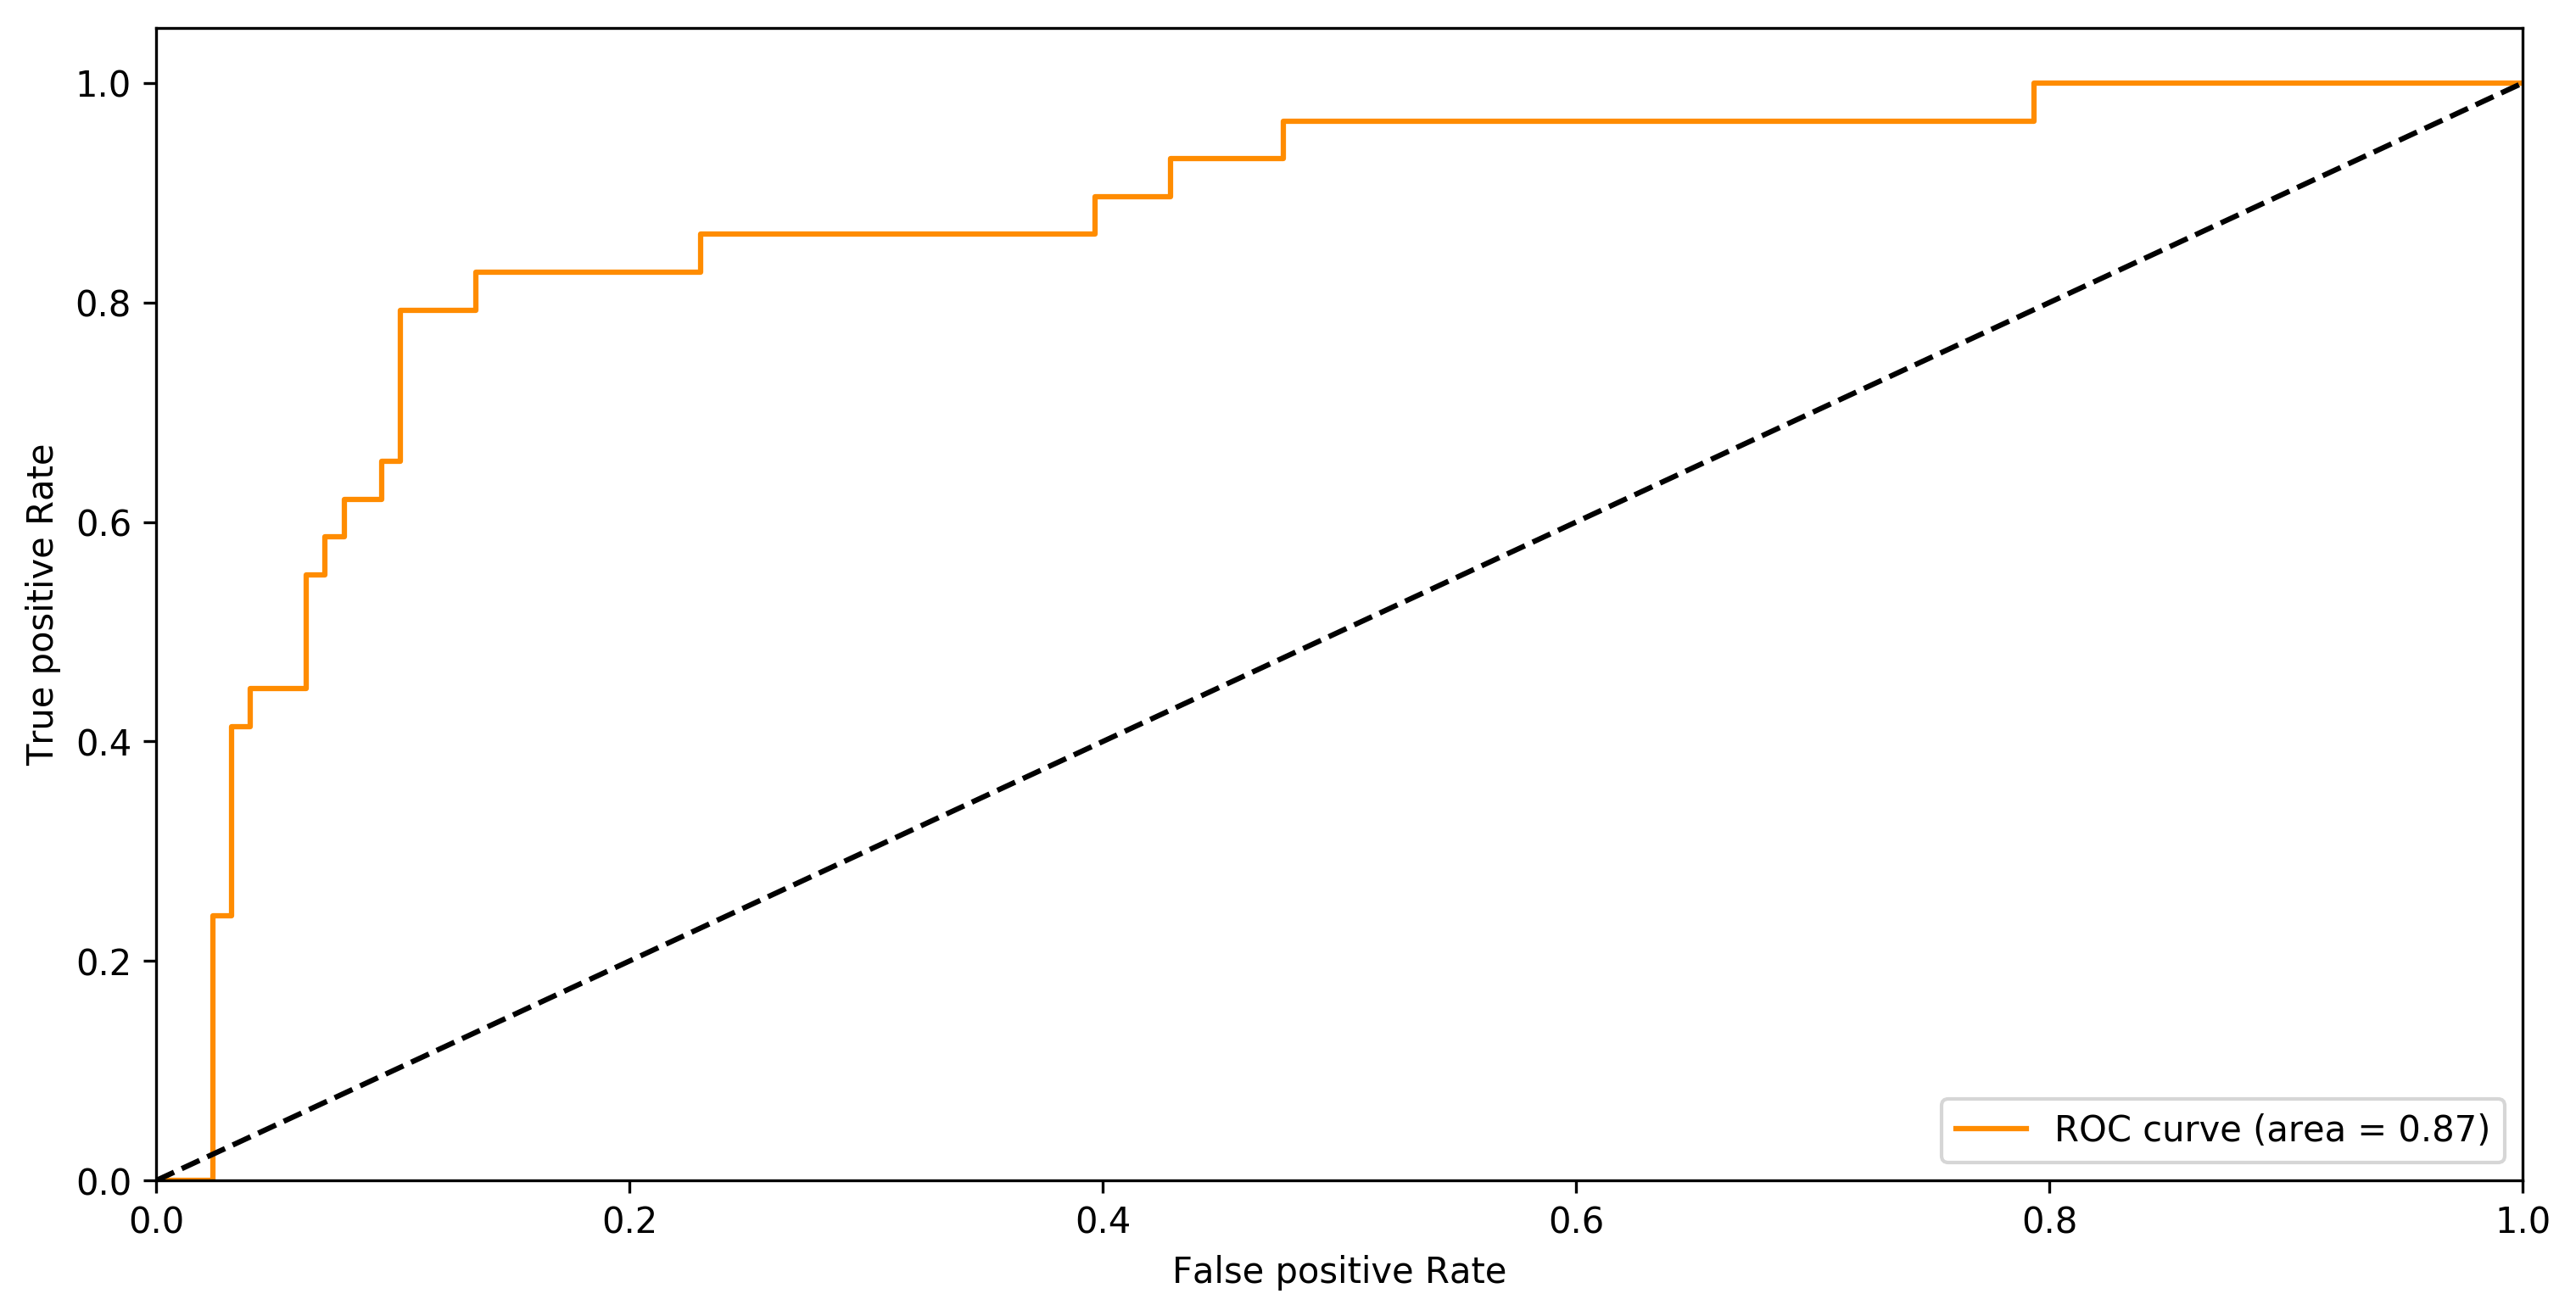

Area under ROC curve: 0.8732895457033388


In [35]:
clf2 = svm.SVC(kernel='rbf', gamma='auto')
dcsn_fn, preds = loocv_preds(clf2, norm_data, targets, threshold=0)
print("Area under ROC curve:", auc_roc(targets, dcsn_fn))

In [36]:
dcsn_fn, preds = loocv_preds(clf2, norm_data, targets, threshold=-0.55)
rec, prec = rec_prec(list(targets), np.array(preds).flatten())
print("Recall:", rec)
print("Precision:", prec)

Recall: 0.7931034482758621
Precision: 0.6216216216216216


Same LOOCV performance as the linear kernel :)

2. Polynomial kernel

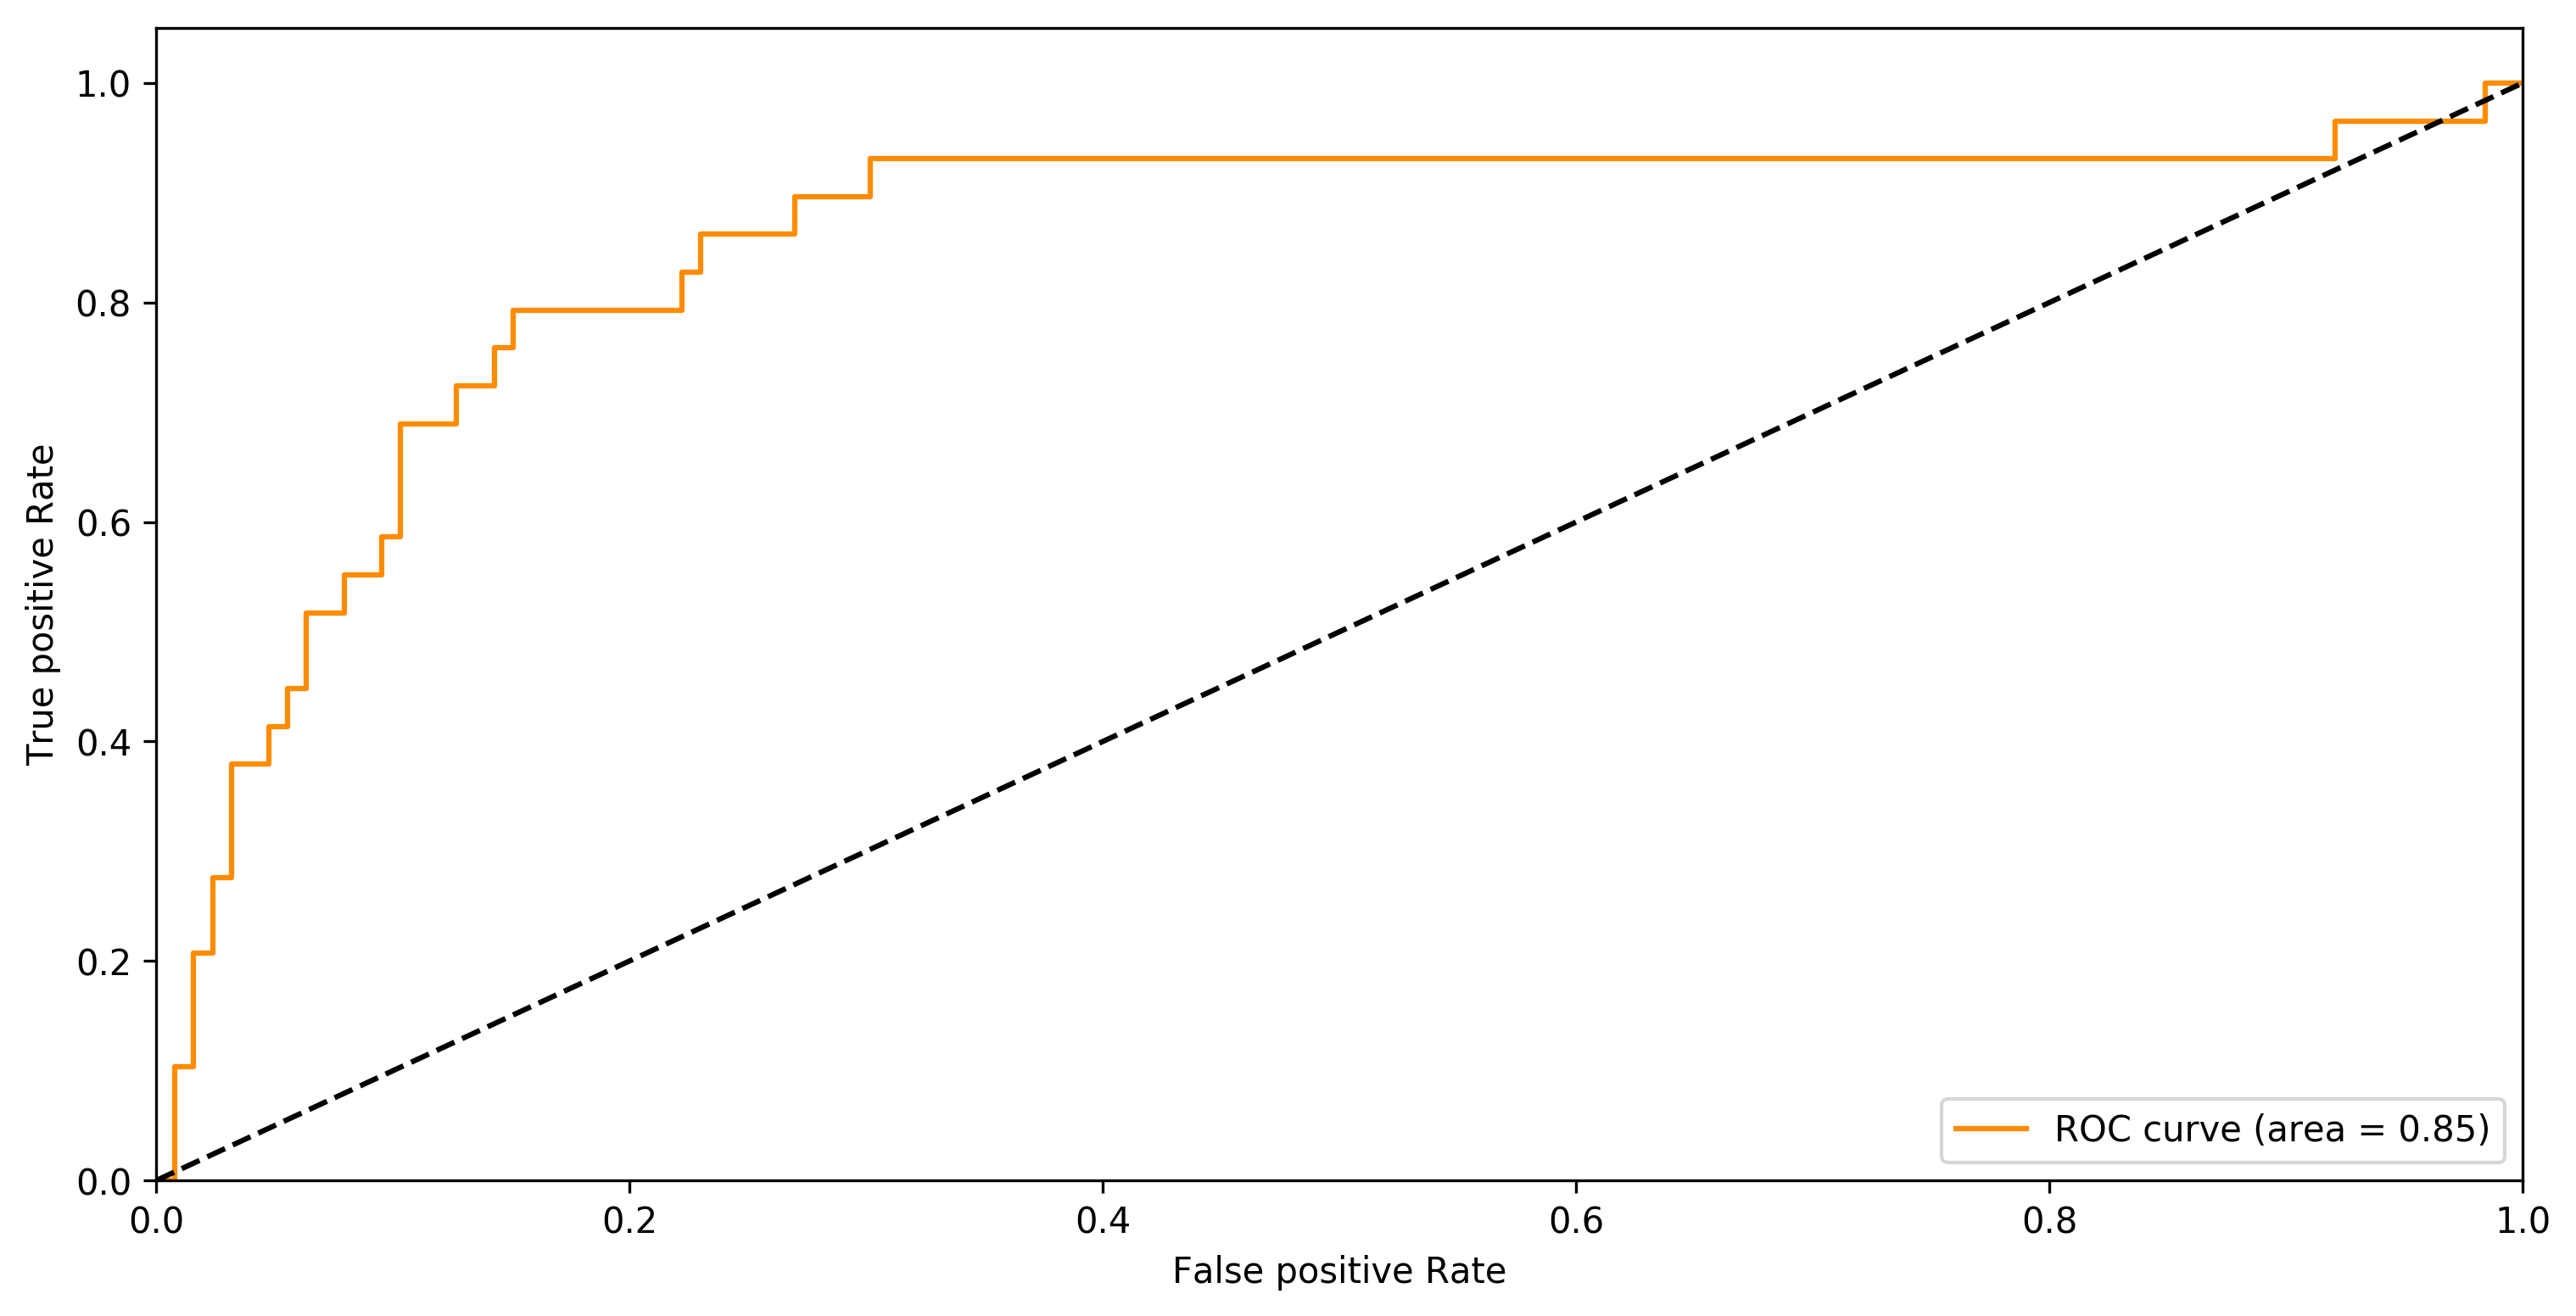

Area under ROC curve: 0.8524904214559387


In [37]:
clf2 = svm.SVC(kernel='poly', degree=3, coef0=1, gamma='auto')
dcsn_fn, preds = loocv_preds(clf2, norm_data, targets, threshold=0)
print("Area under ROC curve:", auc_roc(targets, dcsn_fn))

In [38]:
dcsn_fn, preds = loocv_preds(clf2, norm_data, targets, threshold=-0.75)
rec, prec = rec_prec(list(targets), np.array(preds).flatten())
print("Recall:", rec)
print("Precision:", prec)

Recall: 0.8275862068965517
Precision: 0.46153846153846156


I have tried to vary the degree of polynomial and 3 seemed to work best for degrees 2-10. I tried to vary the threshold to find a good balance for recall and precision, but the recall drops significantly when I move the threshold closer to zero (less negative). Seems like it is hard to project our data to a dimension that would make sense without overfitting (e.g., number of dimensions = number of data points).

### Step 3: Time for neural nets

1. Experiment #1 with a toy network

In [39]:
import keras
from keras.layers import Dense
np.random.seed(1337) # for reproducible results
from keras.models import Sequential

Using TensorFlow backend.


In [47]:
# Building a multi-layer perceptron model
from keras.optimizers import Adam

adam = Adam(0.01)

nn_model = Sequential()
nn_model.add(Dense(8, input_shape=(193,), activation='relu'))
nn_model.add(Dense(8, input_shape=(8,), activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

In [48]:
dcsn_fn, preds = kfold_preds(nn_model, norm_data, targets, threshold=0.4, epochs=15)

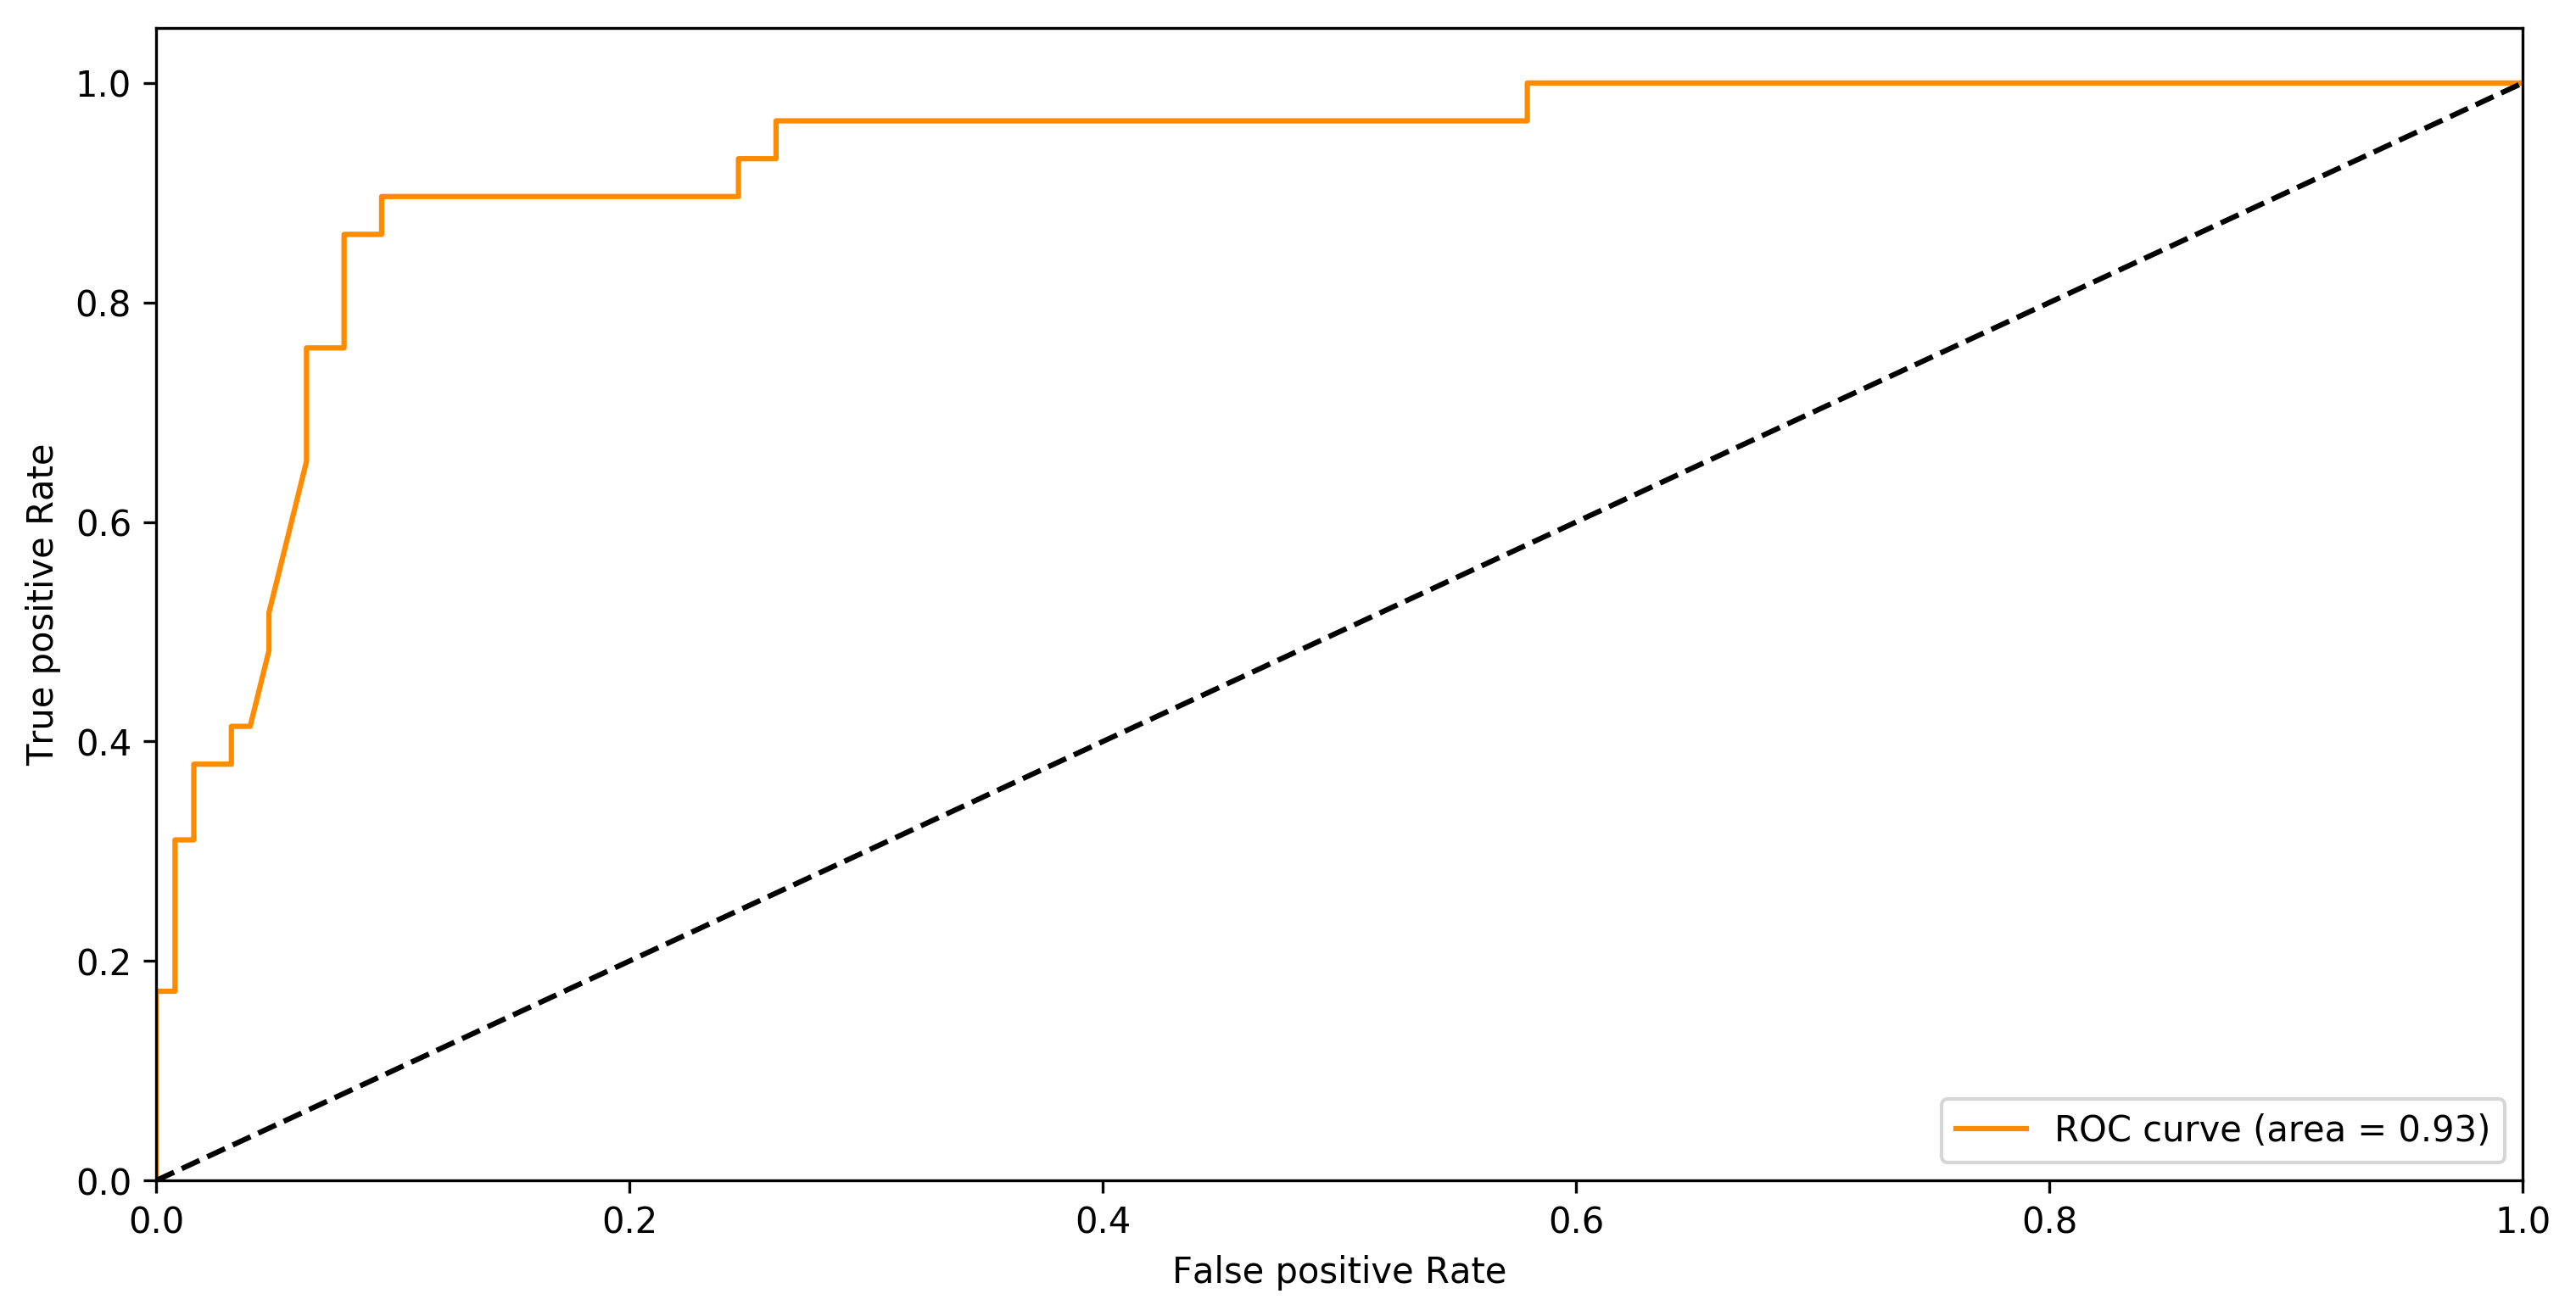

Area under ROC curve: 0.9288451012588944


In [49]:
print("Area under ROC curve:", auc_roc(targets, dcsn_fn))

In [50]:
rec, prec = rec_prec(list(targets), np.array(preds).flatten())
print("Recall:", rec)
print("Precision:", prec)

Recall: 0.7931034482758621
Precision: 0.696969696969697


Not too shaby, the best result so far. 

2. Experiment #2 with a bit more serious network. Gotta look out for overfitting because out dataset is small.

In [44]:
adam = Adam(0.01)

nn_model_2 = Sequential()
nn_model_2.add(Dense(16, input_shape=(193,), activation='relu'))
nn_model_2.add(Dense(16, input_shape=(16,), activation='relu'))
nn_model_2.add(Dense(16, input_shape=(16,), activation='relu'))
nn_model_2.add(Dense(1, activation='sigmoid'))

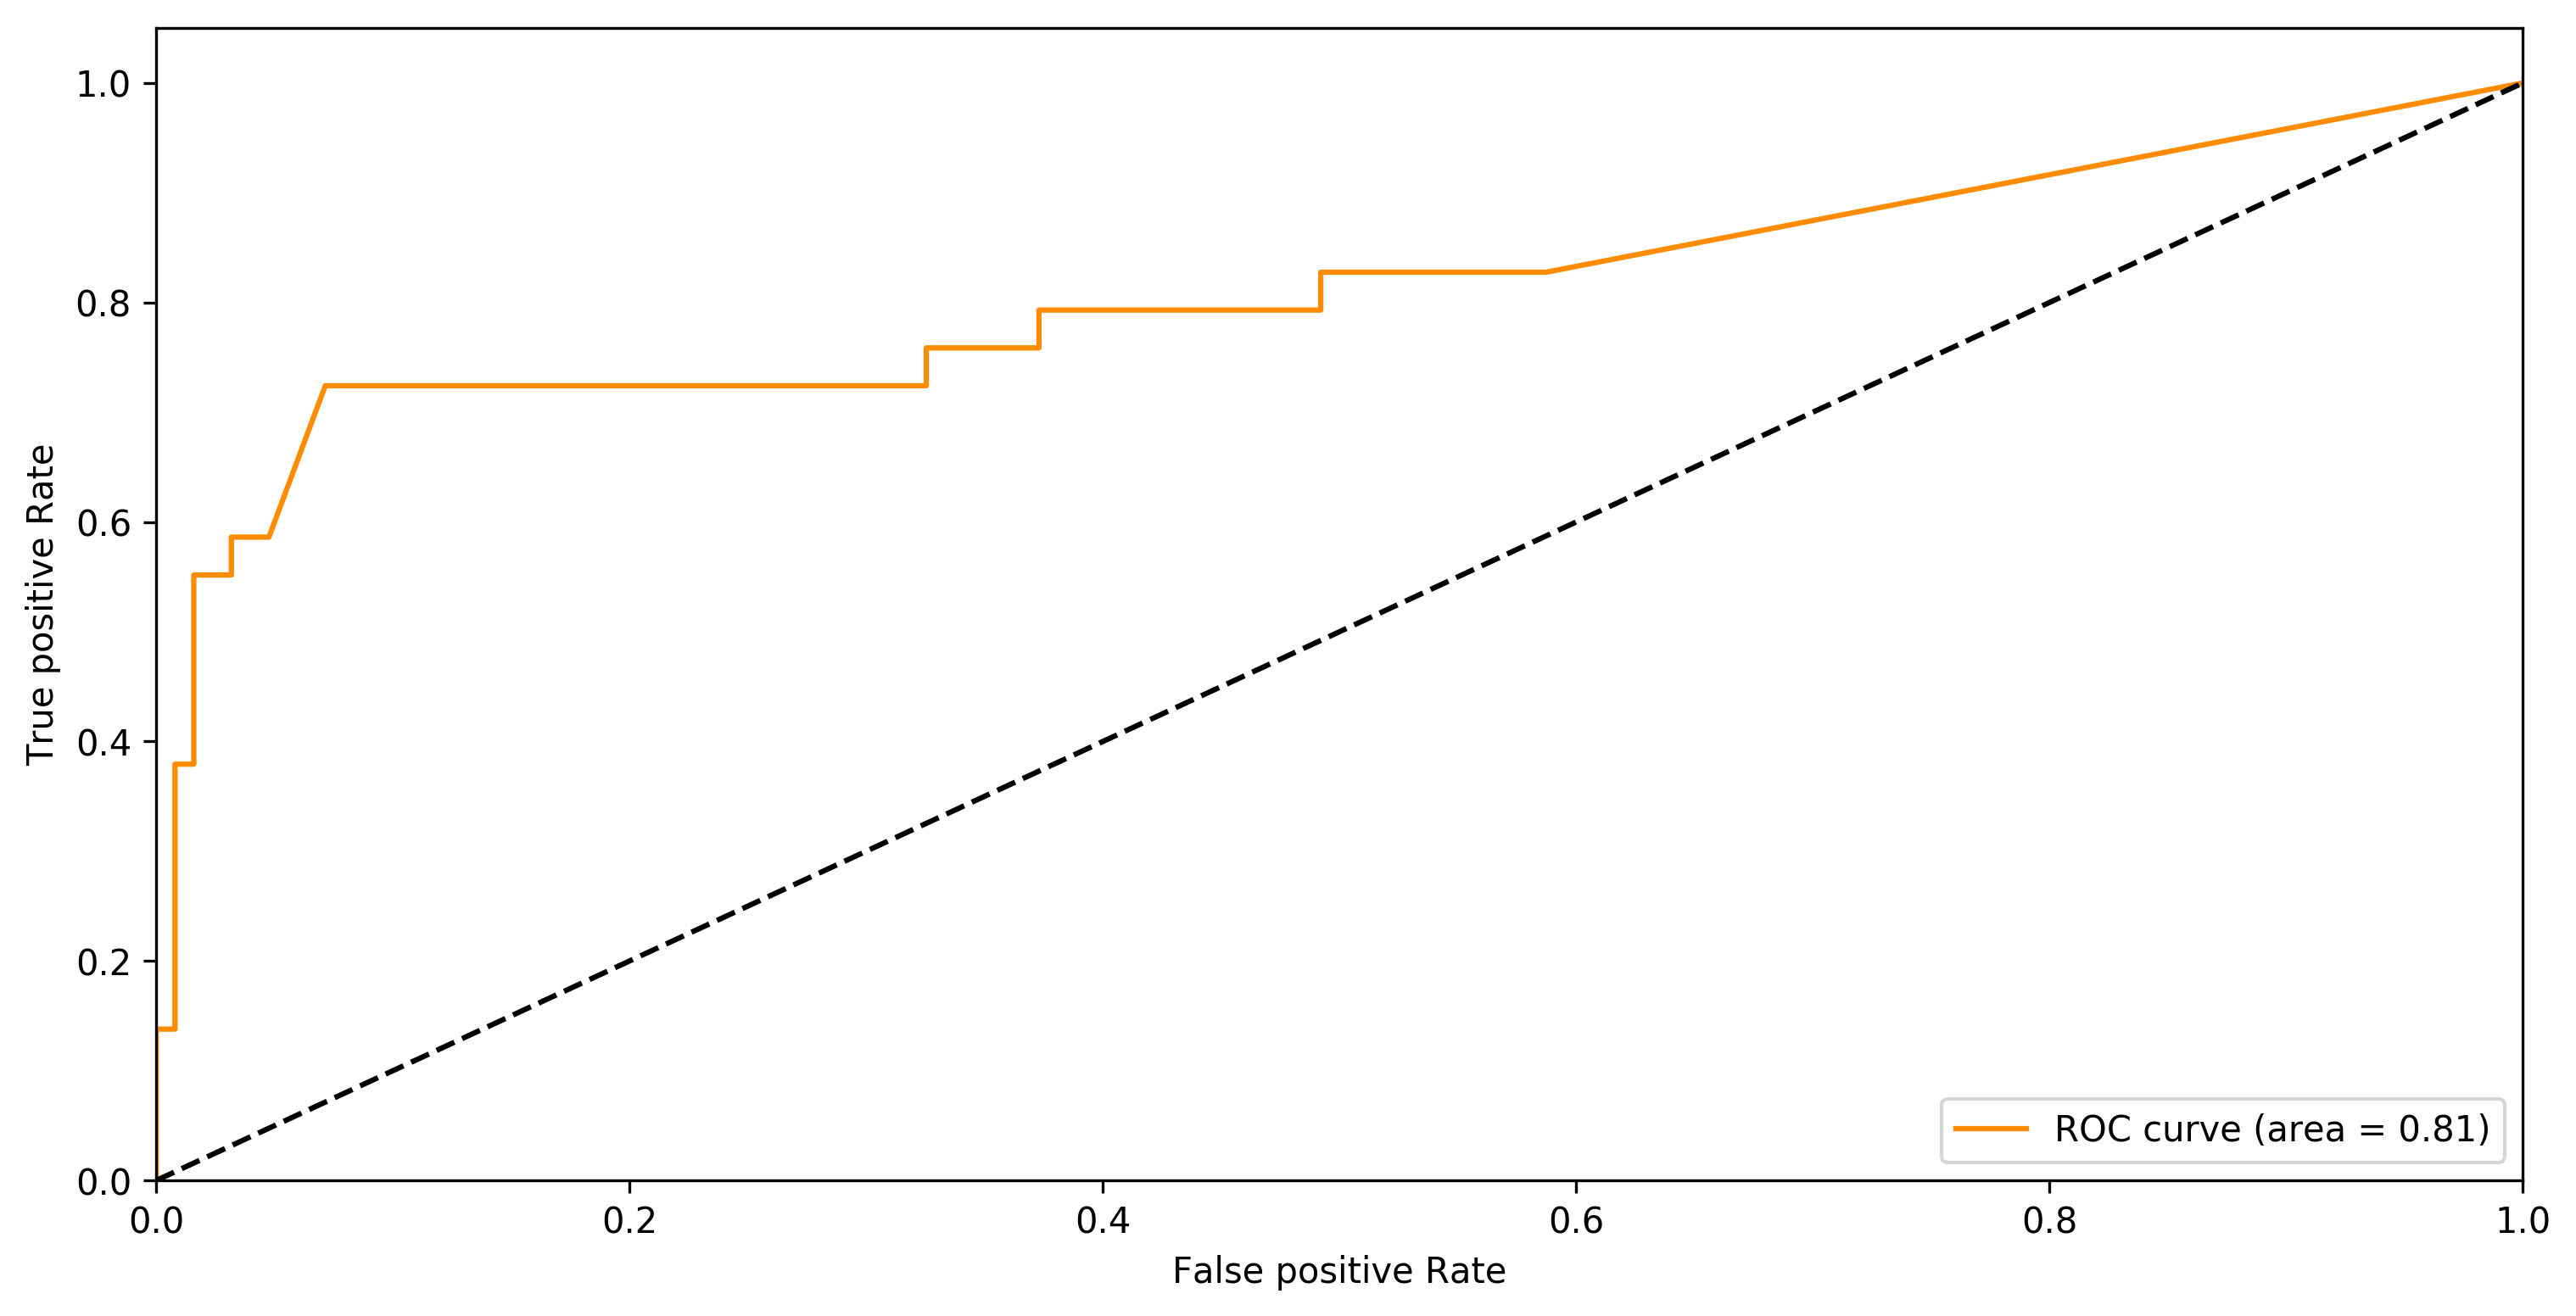

Area under ROC curve: 0.8081554460864805


In [45]:
dcsn_fn, preds = kfold_preds(nn_model_2, norm_data, targets, threshold=0.5, epochs=15)
print("Area under ROC curve:", auc_roc(targets, dcsn_fn))

In [46]:
rec, prec = rec_prec(list(targets), np.array(preds).flatten())
print("Recall:", rec)
print("Precision:", prec)

Recall: 0.5862068965517241
Precision: 0.7391304347826086


Best cumulative result (although a bit worse on recall than the previous model due to elevated threshold).

## Part 6: Alternative approach to classification
So far, we have been utilizing all the features to come up with a decision boundary. However, as I mentioned before, it is very rare (2-5%) that someone has breast cancer on both sides. Thus, using sensor information from both sides might add more noise to the decision function. In the training dataset, the cancer in left or right breasts can be and should be evenly distributed, the right temperatures will also have some weights.

**Example**: there's a tumor in the left breast, but since we use both breasts to determine cancer, the right one would be "cooler" and more normally "temperaturized." Then, when we put together in a dot product, we can get "overwhelmed" by the right breast, for example, some abnormal patterns in the left breast might be averaged out by the weights in the right breast.

### Step 1: Classify which breast is more likely to have cancer
We'll see which breast temperature distribution is furthest from the averaged temperature distribution of corresponding healthy breasts. Whichever breast that is furthest from its respective mean, it will be chosen as the "likely." The other one we will put to the mean healthy breast value to not affect during classification.

### Step 2: Classify the breast with higher likelihood of cancer

## Part 7: Works-to-be-done
In **Part 5**, I used the undergrad student descent to figure our the optimal threshold (e.g. at 0.5 the recall was too low, at 0.3 the precision was too low, go to the middle). The hyperparameter selection could be done automated with grid or random selection in a pre-determined range, and then the range would be modified to be more precise. Techniques like genetic algorithm could also be used to avoid local minima.

For the neural network, if I had more time, I would play around with network depth to see at which point it will start overfitting and settle with that architecture. To counterplay overfitting, I would do data augmentation (oversampling) (via small wiggle around existing datapoints) especially on the cancer dataset to get more defined boundaries for this class. Dropout would also help the problem of overfitting on training dataset.

In this part, I have not looked into representing the sensor measurements as an image array. I would imagine that representing that way, we would avoid the correlated features (nearby sensors) better and find an assessment of temperature landscape as a group of sensors and not only individual sensors multiplied by some weights and added up together (losing information about locality).

Also, I think Part 6 might help boost a couple points in recall since we're "exposing" the irregularities more by not letting the non-affected breast confound the dot-product of measurements.

Last but not least, let me know if you have any questions!